## Final analysis

In [1]:
import pandas as pd
#all
all_data = pd.read_excel("Data2/קובץ מתכלל כללי.xlsx")

#sviot ratzon
all_data[all_data.columns[41]] = all_data[all_data.columns[41]].apply(lambda x: "כן" if x==0 else "לא")

#heil avir & yom alef
yom_alef_avir = all_data[(all_data["חיל אוויר"]=="כן")&(all_data["יום בשבוע"]=="ראשון")]
#heil avir & yom bet
yom_bet_avir = all_data[(all_data["חיל אוויר"]=="כן")&(all_data["יום בשבוע"]=="שני")]

#else & yom alef
yom_alef_else = all_data[(all_data["חיל אוויר"]=="לא")&(all_data["יום בשבוע"]=="ראשון")]

#else & yom bet
yom_bet_else = all_data[(all_data["חיל אוויר"]=="לא")&(all_data["יום בשבוע"]=="שני")]

In [2]:
all_data.dtypes

חותמת זמן                                                                             datetime64[ns]
מהו מגדרך?                                                                                    object
מהו סוג שירותך?                                                                               object
מהו מקום המגורים שלך?                                                                         object
מהו הבסיס אליו אתה מגיע?                                                                      object
מהו מתחם ההסעה בו אתה נמצא כעת?                                                               object
מהי תדירות יציאותיך מהבסיס?                                                                   object
מדוע הגעת לתחנה זו היום? (ניתן לסמן יותר מתשובה אחת)                                          object
באיזו שעה הוגדר לך להגיע לבסיס היום?                                                          object
באיזו שעה אתה מעריך שתגיע לבסיס היום?                                                      

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 49 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   חותמת זמן                                                                           1960 non-null   datetime64[ns]
 1   מהו מגדרך?                                                                          1960 non-null   object        
 2   מהו סוג שירותך?                                                                     1960 non-null   object        
 3   מהו מקום המגורים שלך?                                                               1942 non-null   object        
 4   מהו הבסיס אליו אתה מגיע?                                                            1927 non-null   object        
 5   מהו מתחם ההסעה בו אתה נמצא כעת?                 

In [4]:
import matplotlib.pyplot as plt
def four_plot_nominal(column_number = None, plot_color = 'teal', text_color = 'cyan'):
    """
    four graph for numinal objects
    """
    plt.style.use('ggplot')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.suptitle(all_data.columns[column_number][::-1], size = 20)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    #יום א יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_alef_else[yom_alef_else.columns[column_number]].value_counts().index.tolist()]
    ax1.bar(labels,yom_alef_else[all_data.columns[column_number]].value_counts(), color = plot_color)
    ax1.set_title("יחידות צהל ללא חיל אויר יום א"[::-1])
    
    for j in range(len(yom_alef_else[yom_alef_else.columns[column_number]].value_counts())):
        txt = f"{round(yom_alef_else[yom_alef_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax1.text(j, yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[j]+5,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #יום ב יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_bet_else[yom_bet_else.columns[column_number]].value_counts().index.tolist()]
    ax2.bar(labels,yom_bet_else[yom_bet_else.columns[column_number]].value_counts(), color = plot_color)
    ax2.set_title("יחידות צהל ללא חיל אויר יום ב"[::-1])
    ax2.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_else[yom_bet_else.columns[column_number]].value_counts())):
        txt = f"{round(yom_bet_else[yom_bet_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax2.text(j, yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום א
    labels = [label[::-1] for label in yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts().index.tolist()]
    ax3.bar(labels,yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(), color = plot_color)
    ax3.set_title("חיל אויר יום א"[::-1])
    ax3.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts())):
        txt = f"{round(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax3.text(j, yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום ב
    labels = [label[::-1] for label in yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts().index.tolist()]
    ax4.bar(labels,yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(), color = plot_color)
    ax4.set_title("חיל אויר יום ב"[::-1])
    ax4.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts())):
        txt = f"{round(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax4.text(j, yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[j]-1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))
    
def all_plot_nominal(column_number = None, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (8,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts(), color = plot_color)
    for j in range(len(all_data[all_data.columns[column_number]].value_counts())):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+5,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.show()
    
def four_plot_nominal2(column_number = None, n= 10,height = 10, width = 10, plot_color = 'teal', text_color = 'cyan'):
    """
    four graph for numinal objects
    """
    plt.style.use('ggplot')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_figheight(height)
    fig.set_figwidth(width)
    fig.suptitle(all_data.columns[column_number][::-1], size = 20)

    #יום א יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_alef_else[yom_alef_else.columns[column_number]].value_counts().index.tolist()[:n]]
    ax1.bar(labels,yom_alef_else[all_data.columns[column_number]].value_counts()[:n], color = plot_color)
    ax1.set_xticklabels(labels,rotation=45)
    ax1.set_title("יחידות צהל ללא חיל אויר יום א"[::-1])
    ax1.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_alef_else[yom_alef_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax1.text(j, yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #יום ב יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_bet_else[yom_bet_else.columns[column_number]].value_counts().index.tolist()[:n]]
    ax2.bar(labels,yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[:n], color = plot_color)
    ax2.set_xticklabels(labels,rotation=45)
    ax2.set_title("יחידות צהל ללא חיל אויר יום ב"[::-1])
    ax2.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_bet_else[yom_bet_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax2.text(j, yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום א
    labels = [label[::-1] for label in yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts().index.tolist()[:n]]
    ax3.bar(labels,yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[:n], color = plot_color)
    ax3.set_xticklabels(labels,rotation=45)
    ax3.set_title("חיל אויר יום א"[::-1])
    ax3.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax3.text(j, yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום ב
    labels = [label[::-1] for label in yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts().index.tolist()[:n]]
    ax4.bar(labels,yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[:n], color = plot_color)
    ax4.set_xticklabels(labels,rotation=45)
    ax4.set_title("חיל אויר יום ב"[::-1])
    ax4.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax4.text(j, yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[j]-1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))
    
def all_plot_nominal2(column_number = None,n = 10, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (20,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()[:n]]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts()[:n], color = plot_color)
    
    for j in range(len(all_data[all_data.columns[column_number]].value_counts()[:n])):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.show()
#for ax in fig.get_axes():
    #ax.label_outer()
    
def all_plot_nominal3(column_number = None,n = 10, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (20,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()[:n]]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts()[:n], color = plot_color)

    for j in range(len(all_data[all_data.columns[column_number]].value_counts()[:n])):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.xticks(rotation=90,size = 14)
    plt.show()

# מגדר

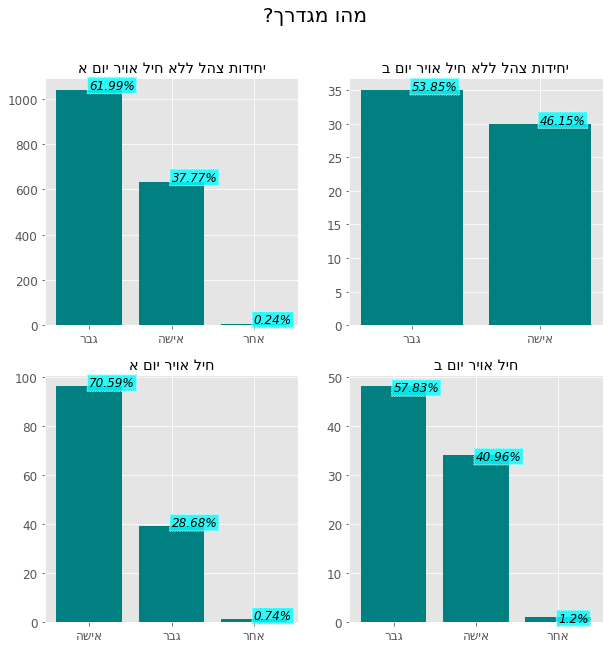

In [5]:
four_plot_nominal(1)

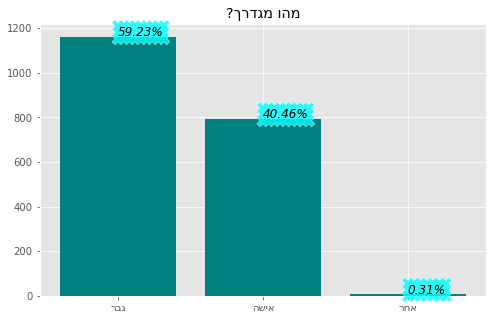

In [6]:
all_plot_nominal(1)

# סוג שירות

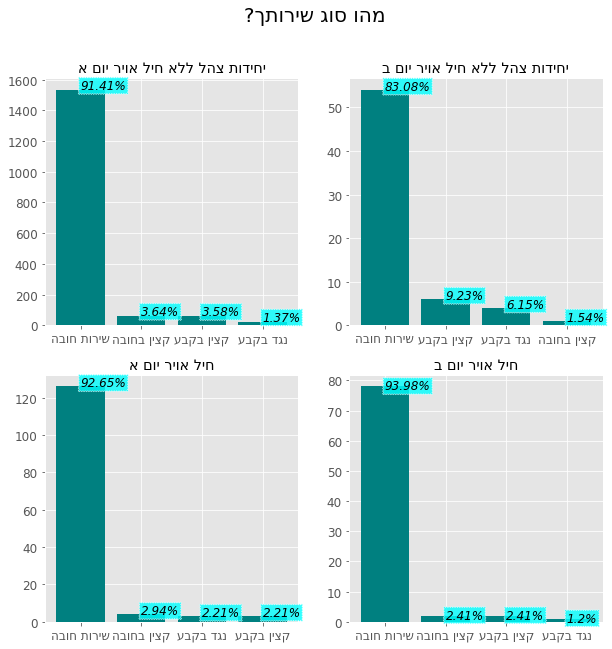

In [7]:
four_plot_nominal(2)

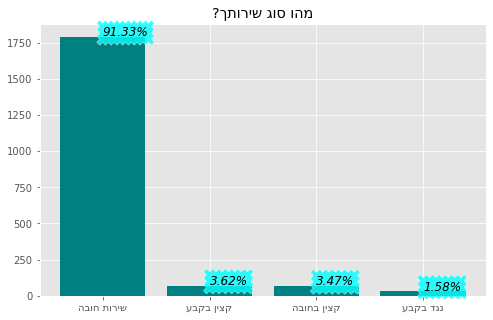

In [8]:
all_plot_nominal(2)

# מקום מגורים

C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


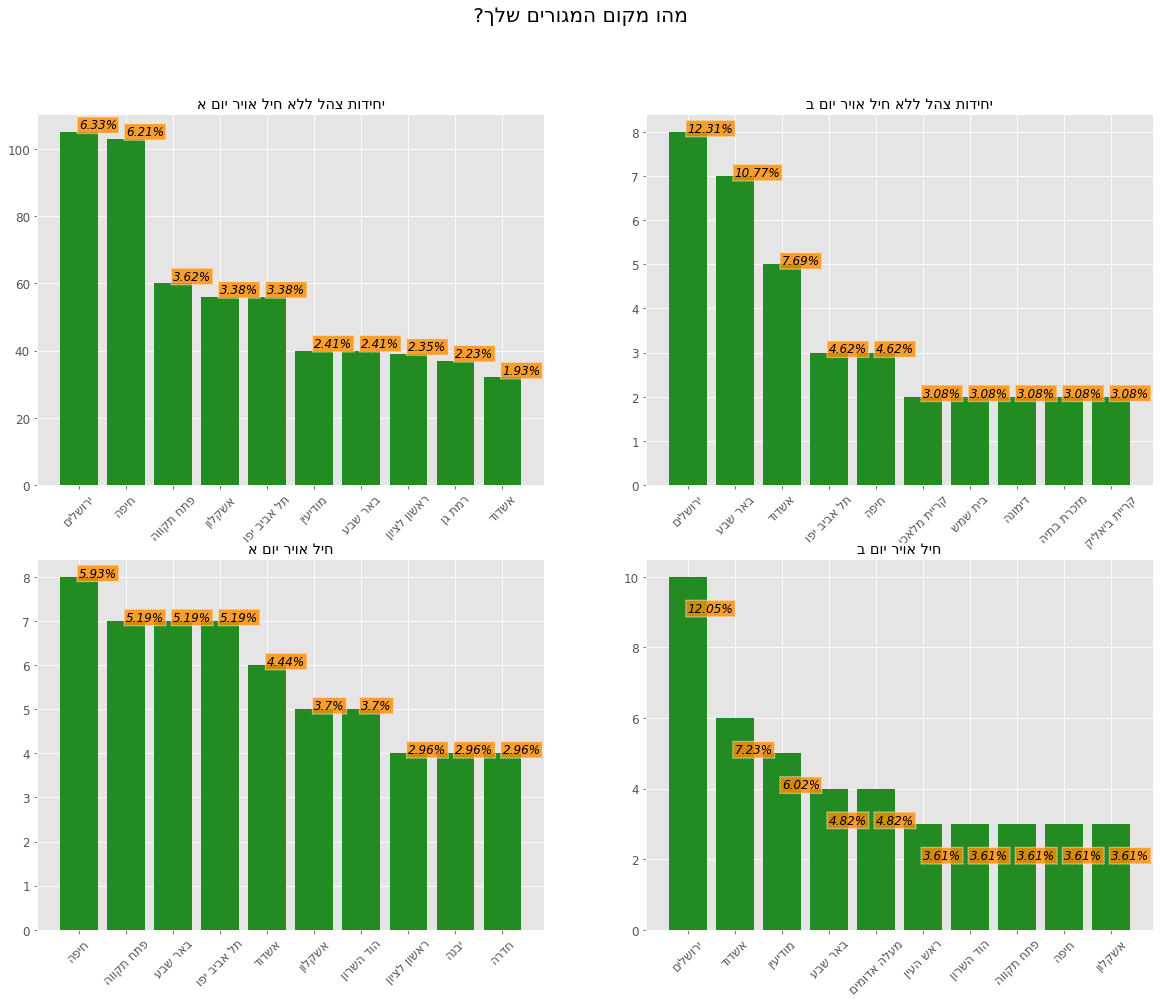

In [9]:
four_plot_nominal2(3,height = 15,width = 20,plot_color = 'forestgreen',text_color ='darkorange')

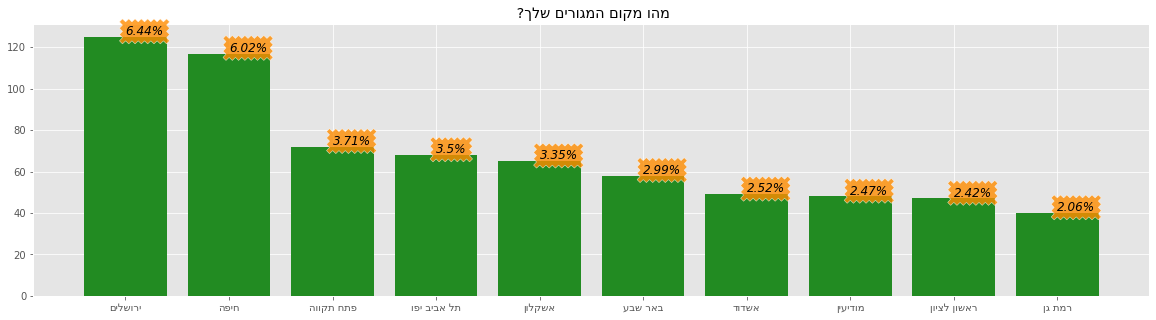

In [10]:
all_plot_nominal2(3,10,plot_color = 'forestgreen',text_color ='darkorange')

# בסיס

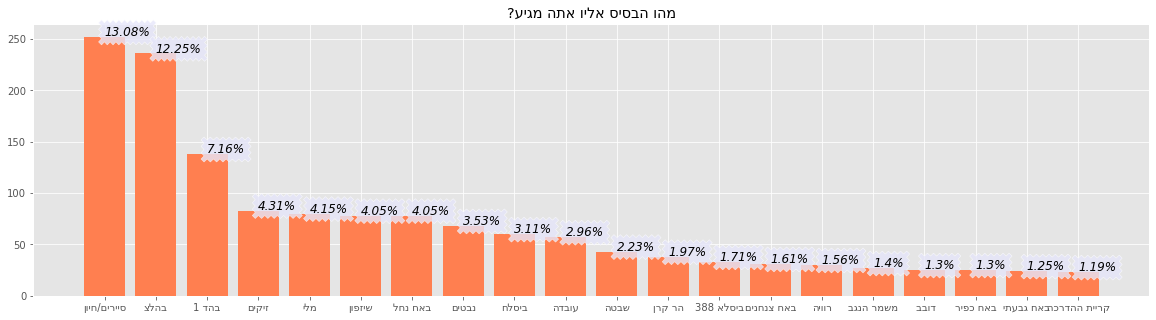

In [11]:
all_plot_nominal2(4,20,plot_color = 'coral',text_color ='lavender')

C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


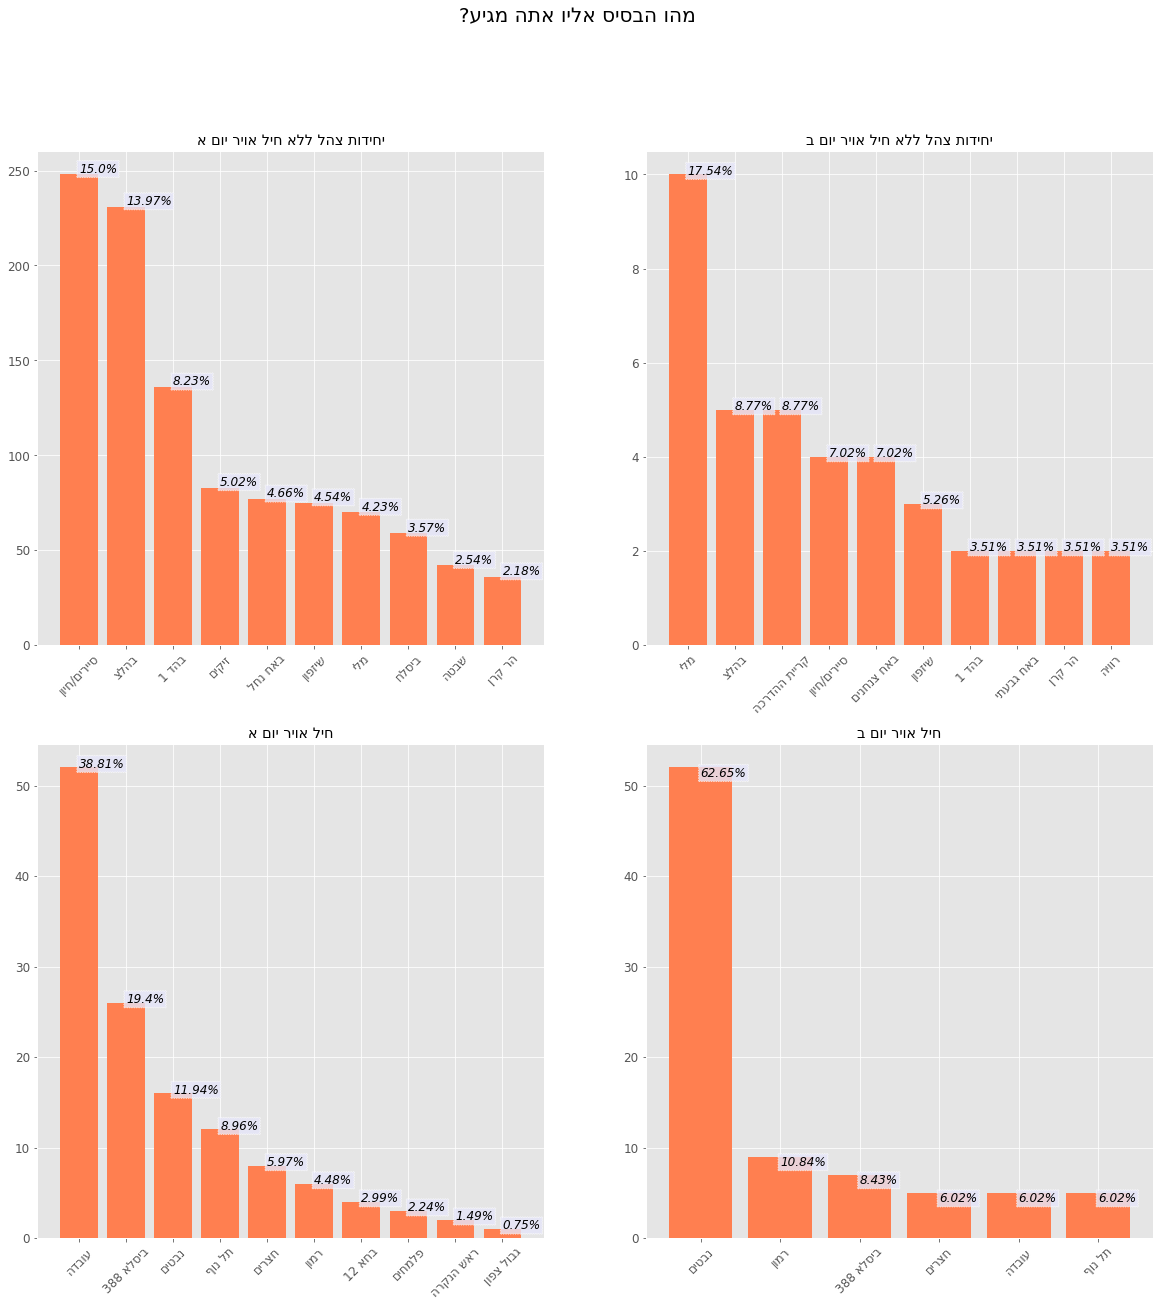

In [12]:
four_plot_nominal2(4,10,20,20,plot_color = 'coral',text_color ='lavender')

# מתחם הסעה

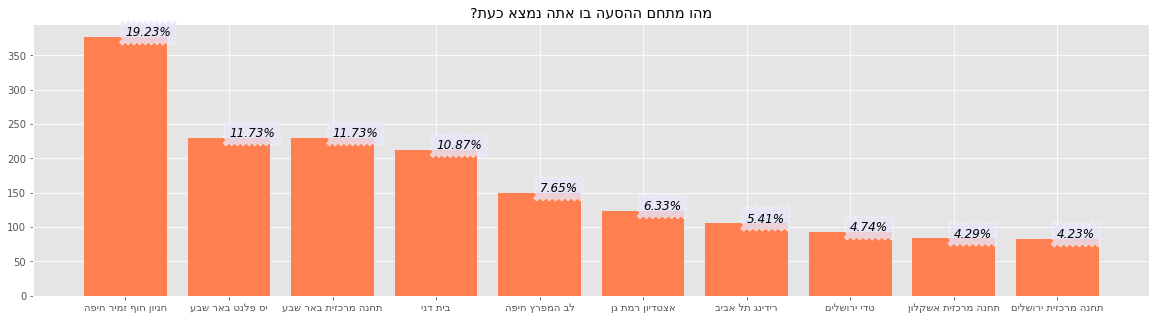

In [13]:
all_plot_nominal2(5,plot_color = 'coral',text_color ='lavender')

C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


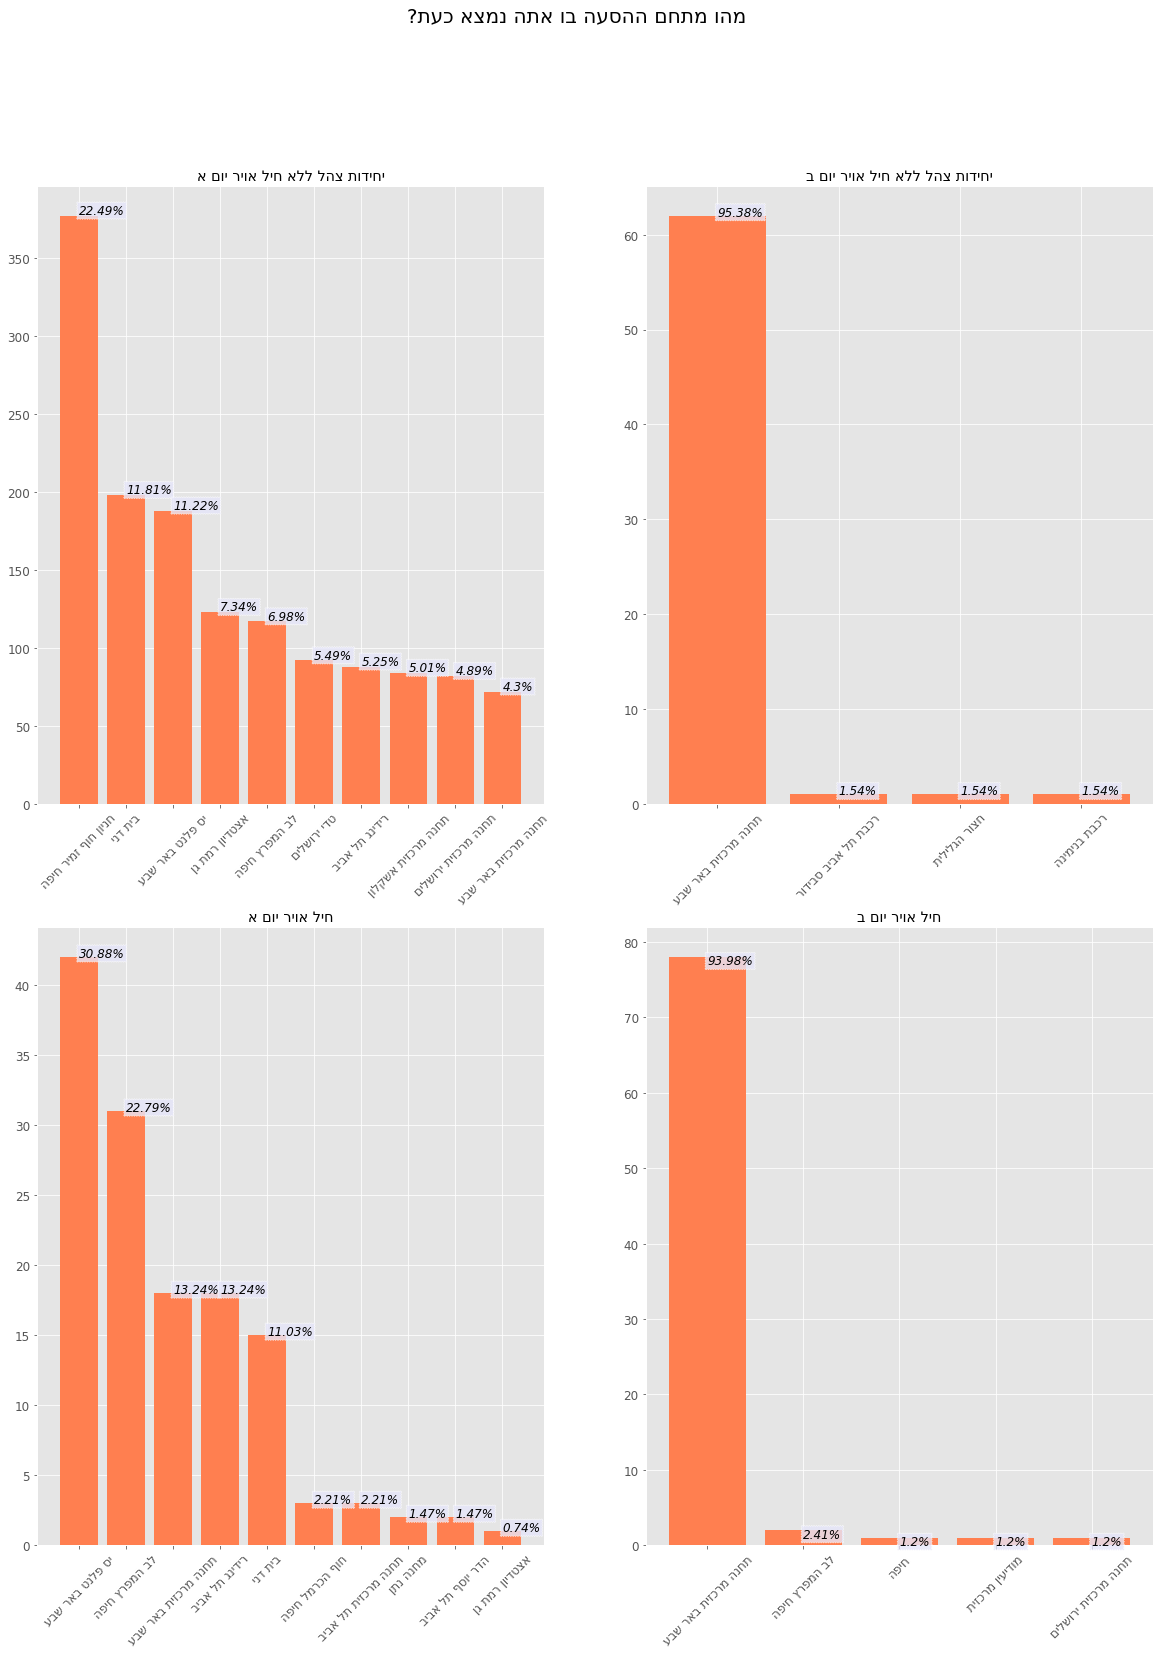

In [14]:
four_plot_nominal2(5,height = 25,width = 20,plot_color = 'coral',text_color ='lavender')

# תדירות יציאות מהבסיס

C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


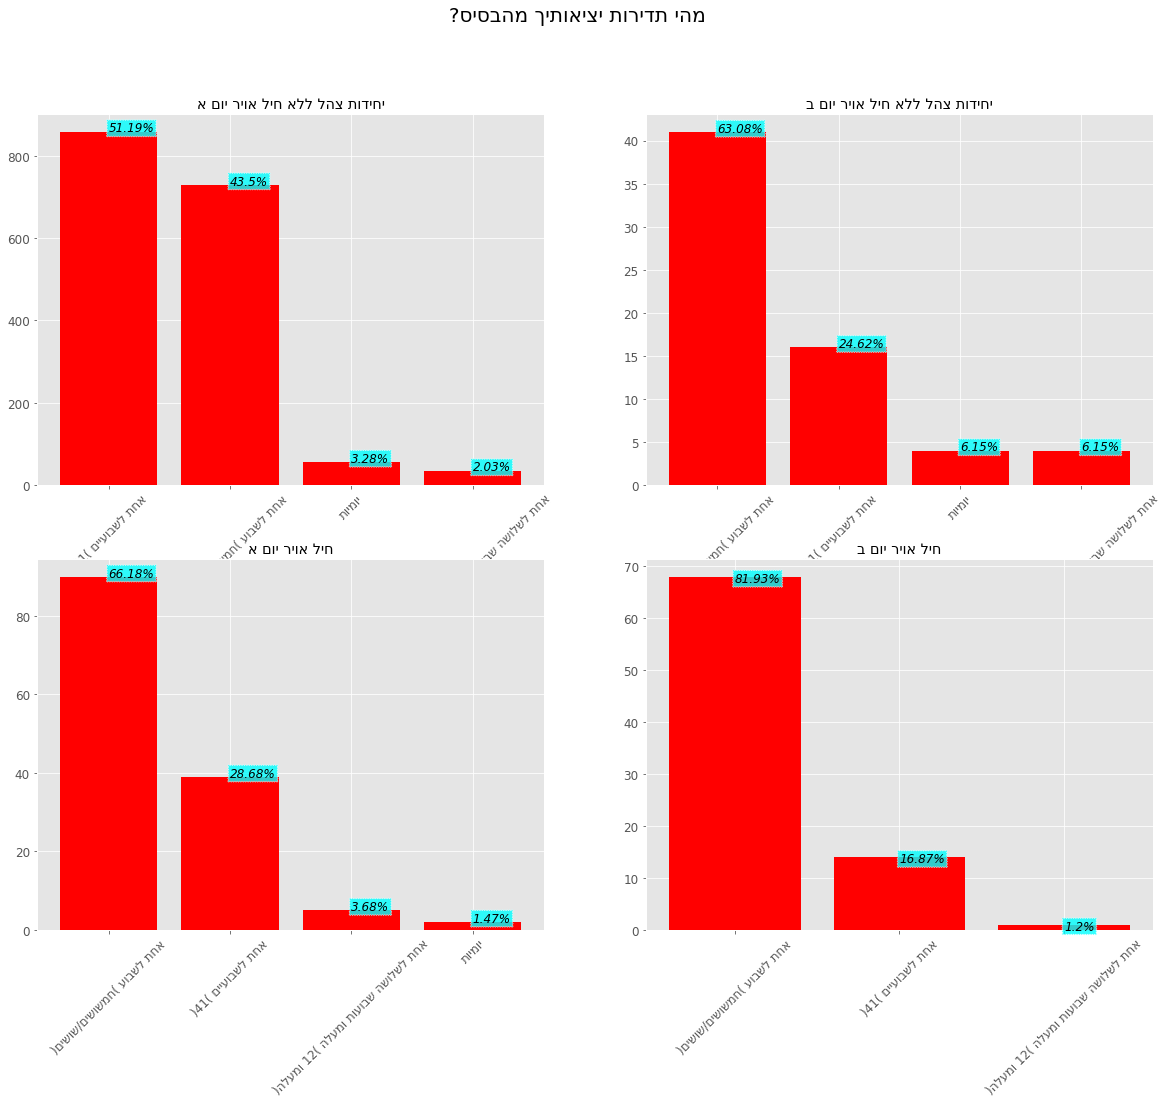

In [15]:
#a
four_plot_nominal2(6,4,15,20,'red','cyan')

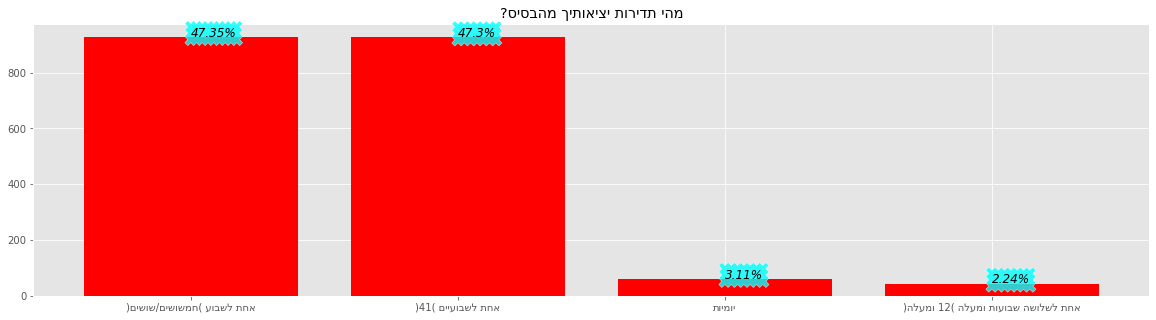

In [16]:
all_plot_nominal2(6,4,'red','cyan')

# סיבת הגעה לתחנה

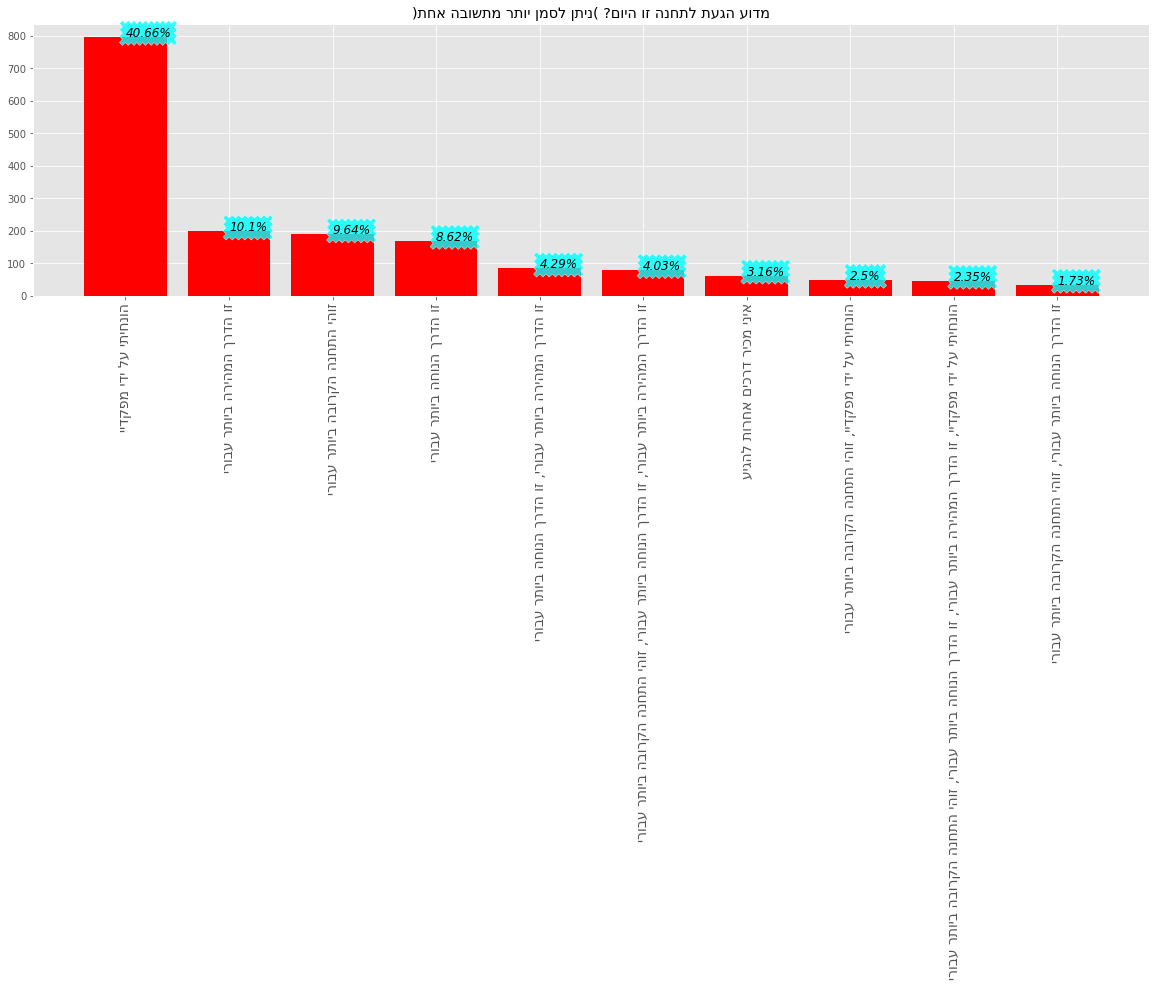

In [17]:
all_plot_nominal3(7,10,'red','cyan')

C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


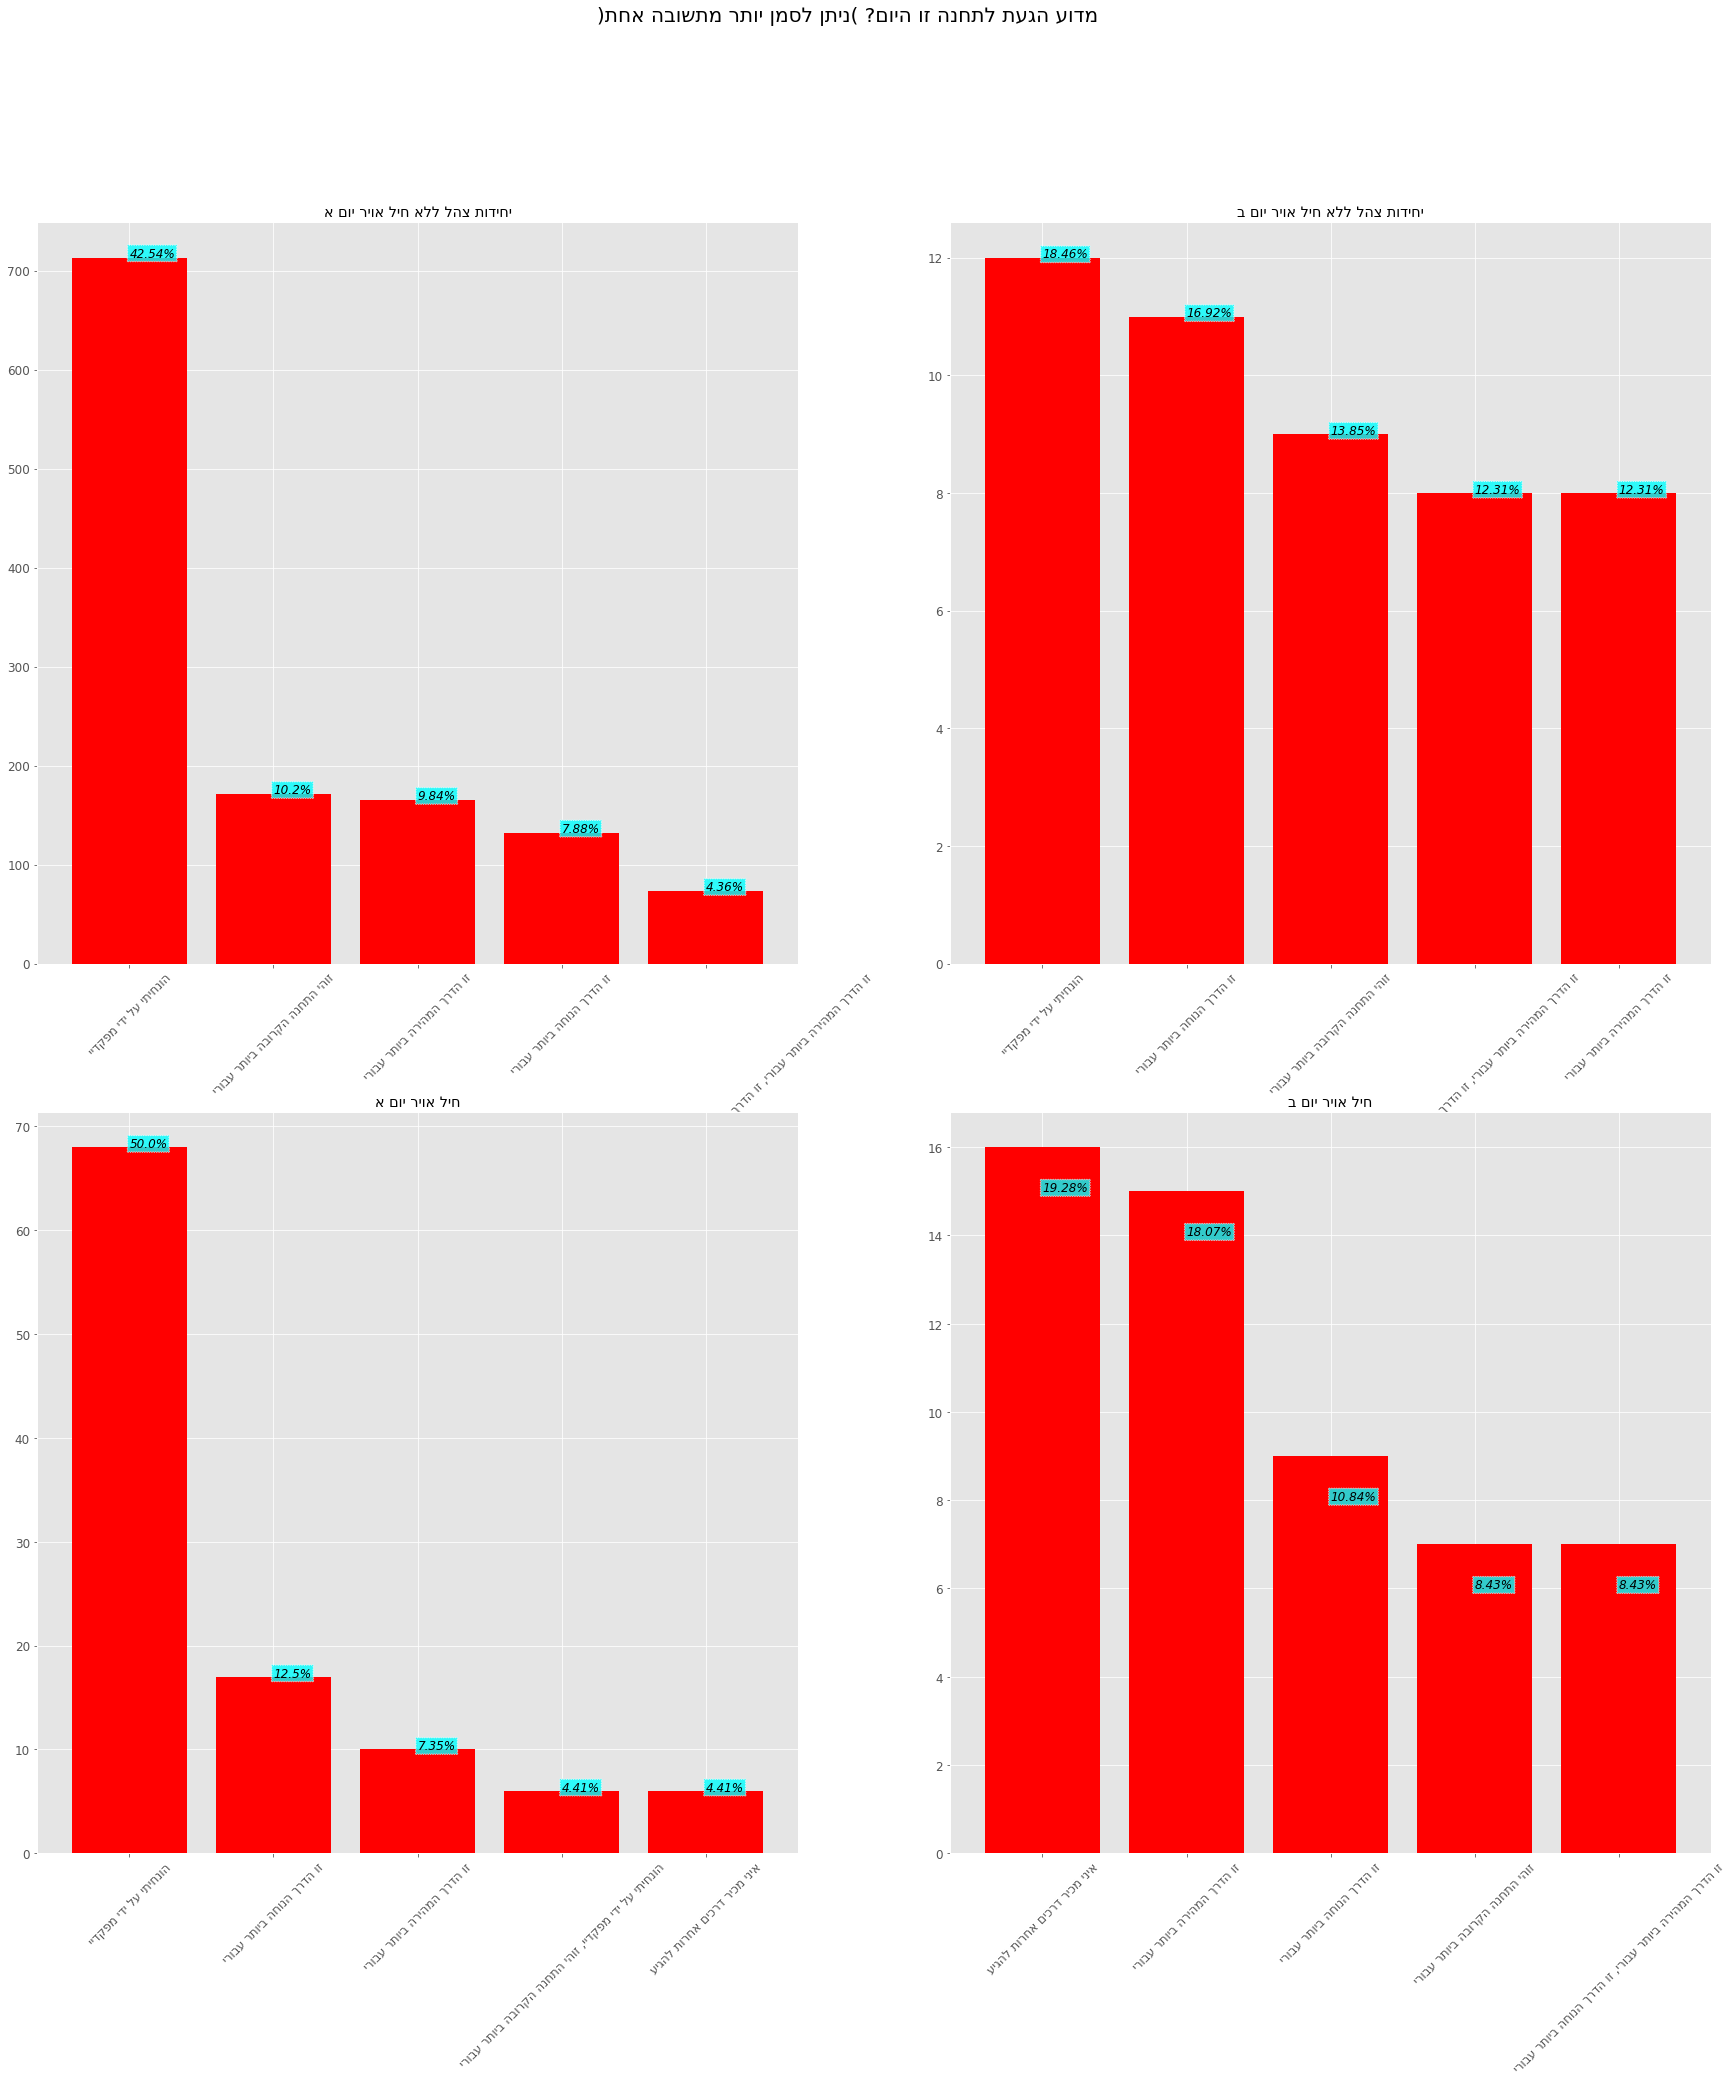

In [18]:
four_plot_nominal2(7,5,30,30,'red','cyan')

#  הצלבה בין שביעות רצון שאט"ל לבין חניון 

In [19]:
df = all_data.groupby(by = all_data.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                             count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                      
חניון חוף זמיר חיפה                                                            119   
יס פלנט באר שבע                                                                101   
אצטדיון רמת גן                                                                  69   
בית דני                                                                         56   
לב המפרץ חיפה                                                                   49   
רידינג תל אביב                                                                  42   
טדי ירושלים                                                                     41   
תחנה מרכזית באר שבע                                                             39   
אצטדיון טדי                                                                     14   
תחנה מרכזית ירושלים                                                             14   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
חניון חוף זמיר חיפה              4.025210  
יס פלנט באר שבע                  4.079208  
אצטדיון רמת גן                   4.173913  
בית דני                          4.232143  
לב המפרץ חיפה                    3.673469  
רידינג תל אביב                   3.904762  
טדי ירושלים                      4.414634  
תחנה מרכזית באר שבע              3.974359  
אצטדיון טדי                      4.357143  
תחנה מרכזית ירושלים              3.928571

In [20]:
df = yom_alef_avir.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,4:6]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                        count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                 
יס פלנט באר שבע                                                            42   
לב המפרץ חיפה                                                              31   
רידינג תל אביב                                                             18   
תחנה מרכזית באר שבע                                                        18   
בית דני                                                                    15   
תחנה מרכזית תל אביב                                                         3   
חוף הכרמל חיפה                                                              3   
הדר יוסף תל אביב                                                            2   
מחנה נתן                                                                    2   
אצטדיון רמת גן                                                              1   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
יס פלנט באר שבע                  3.238095  
לב המפרץ חיפה                    3.419355  
רידינג תל אביב                   3.388889  
תחנה מרכזית באר שבע              3.000000  
בית דני                          4.066667  
תחנה מרכזית תל אביב              3.666667  
חוף הכרמל חיפה                   3.333333  
הדר יוסף תל אביב                 4.000000  
מחנה נתן                         2.000000  
אצטדיון רמת גן                   4.000000

In [21]:
df = yom_bet_avir.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                         count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                  
תחנה מרכזית באר שבע                                                         78   
לב המפרץ חיפה                                                                2   
מודיעין מרכזית                                                               1   
תחנה מרכזית ירושלים                                                          1   
חיפה                                                                         1   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
תחנה מרכזית באר שבע              3.141026  
לב המפרץ חיפה                    3.000000  
מודיעין מרכזית                   5.000000  
תחנה מרכזית ירושלים              5.000000  
חיפה                             3.000000

In [22]:
df = yom_bet_else.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                         count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                  
תחנה מרכזית באר שבע                                                         62   
חצור הגלילית                                                                 1   
רכבת בנימינה                                                                 1   
רכבת תל אביב סבידור                                                          1   

                                          
                                    mean  
מהו מתחם ההסעה בו אתה נמצא כעת?           
תחנה מרכזית באר שבע              3.66129  
חצור הגלילית                     3.00000  
רכבת בנימינה                     3.00000  
רכבת תל אביב סבידור              2.00000

In [23]:
df = yom_alef_else.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                             count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                      
חניון חוף זמיר חיפה                                                            119   
יס פלנט באר שבע                                                                 98   
אצטדיון רמת גן                                                                  68   
בית דני                                                                         56   
לב המפרץ חיפה                                                                   49   
טדי ירושלים                                                                     41   
רידינג תל אביב                                                                  41   
תחנה מרכזית באר שבע                                                             20   
אצטדיון טדי                                                                     14   
תחנה מרכזית ירושלים                                                             14   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
חניון חוף זמיר חיפה              4.025210  
יס פלנט באר שבע                  4.081633  
אצטדיון רמת גן                   4.176471  
בית דני                          4.232143  
לב המפרץ חיפה                    3.673469  
טדי ירושלים                      4.414634  
רידינג תל אביב                   3.902439  
תחנה מרכזית באר שבע              3.950000  
אצטדיון טדי                      4.357143  
תחנה מרכזית ירושלים              3.928571

#  שביעות רצון תואמת 

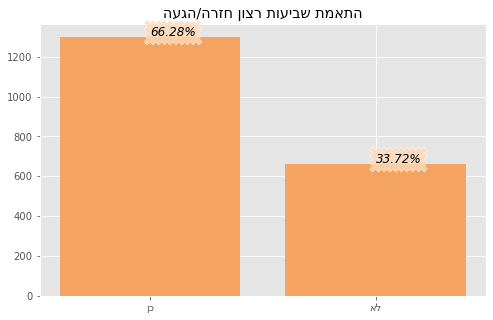

In [24]:
all_plot_nominal(41,'sandybrown','peachpuff')

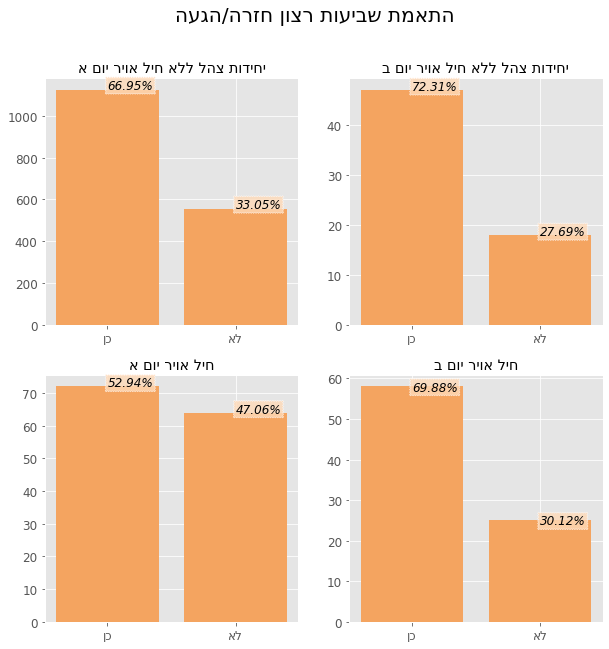

In [25]:
four_plot_nominal(41,'sandybrown','peachpuff')

#  השוואת שביעות רצון 

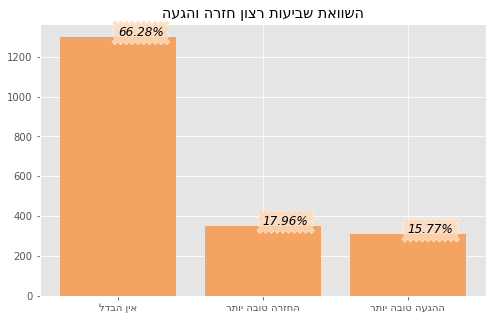

In [26]:
all_plot_nominal(42,'sandybrown','peachpuff')

C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


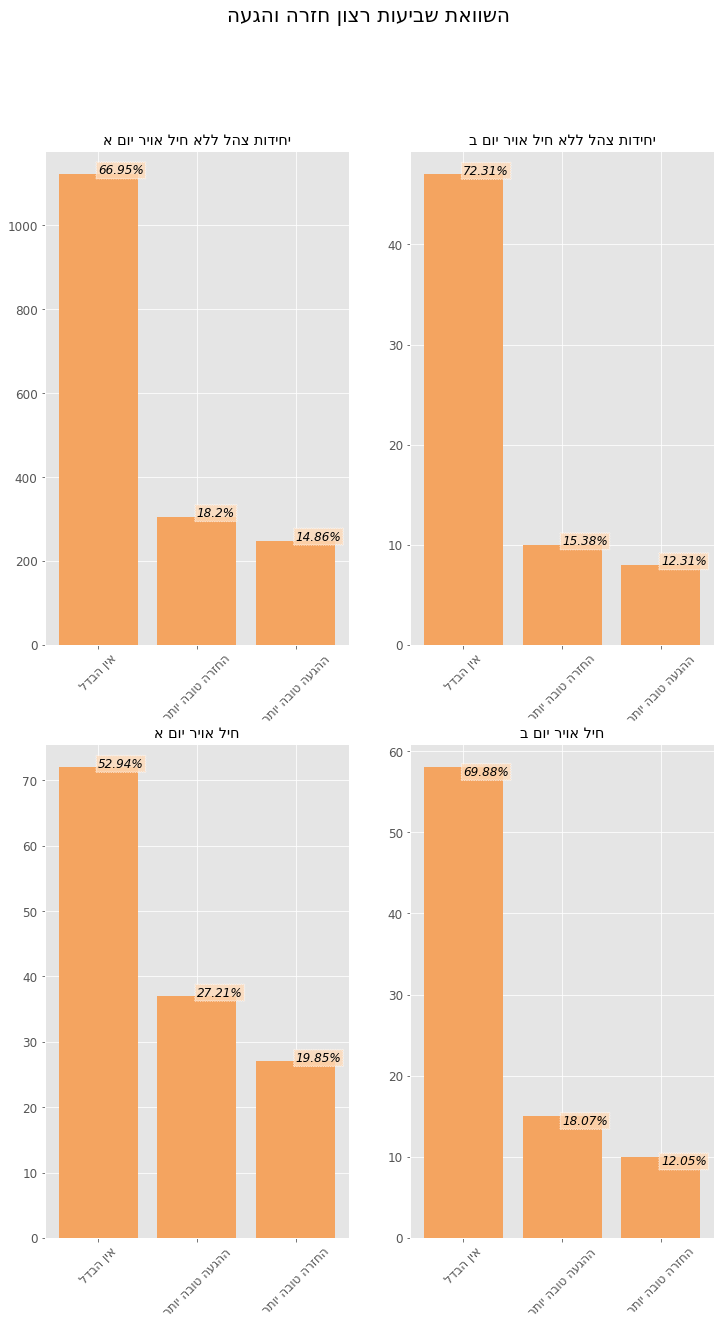

In [27]:
four_plot_nominal2(42,3,20,12,'sandybrown','peachpuff')

#  הצלבה בין שביעות רצון שאט"ל לבין מקום מגורים 

In [28]:
df = all_data.groupby(by = all_data.columns[3]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                    count   
מהו מקום המגורים שלך?                                                       
ירושלים                                                                44   
חיפה                                                                   28   
באר שבע                                                                24   
פתח תקווה                                                              23   
תל אביב יפו                                                            22   
רמת גן                                                                 20   
מודיעין                                                                19   
ראשון לציון                                                            17   
אשקלון                                                                 12   
כפר סבא                                                                11   

                                  
                            mean  
מהו מקום המגורים שלך?             
ירושלים                 4.295455  
חיפה                    4.107143  
באר שבע                 4.416667  
פתח תקווה               4.130435  
תל אביב יפו             4.500000  
רמת גן                  3.800000  
מודיעין                 4.105263  
ראשון לציון             3.470588  
אשקלון                  3.833333  
כפר סבא                 4.090909

#  הצלבה בין שביעות רצון שאט"ל לבין מקום בסיס 

In [29]:
df = all_data.groupby(by = all_data.columns[4]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                      count   
מהו הבסיס אליו אתה מגיע?                                                      
בהלצ                                                                    160   
סיירים/חיון                                                             104   
באח נחל                                                                  47   
באח צנחנים                                                               27   
בהד 1                                                                    26   
דובב                                                                     19   
שבטה                                                                     17   
קריית ההדרכה                                                             17   
הר קרן                                                                   16   
שיזפון                                                                   14   

                                    
                              mean  
מהו הבסיס אליו אתה מגיע?            
בהלצ                      4.075000  
סיירים/חיון               4.163462  
באח נחל                   4.446809  
באח צנחנים                4.222222  
בהד 1                     4.038462  
דובב                      4.105263  
שבטה                      4.529412  
קריית ההדרכה              4.058824  
הר קרן                    3.812500  
שיזפון                    3.785714

# תדרוך יציאה הביתה

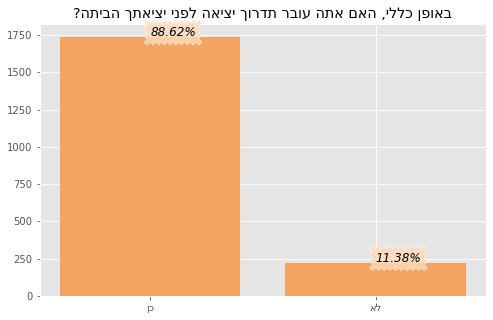

In [30]:
all_plot_nominal(12,'sandybrown','peachpuff')

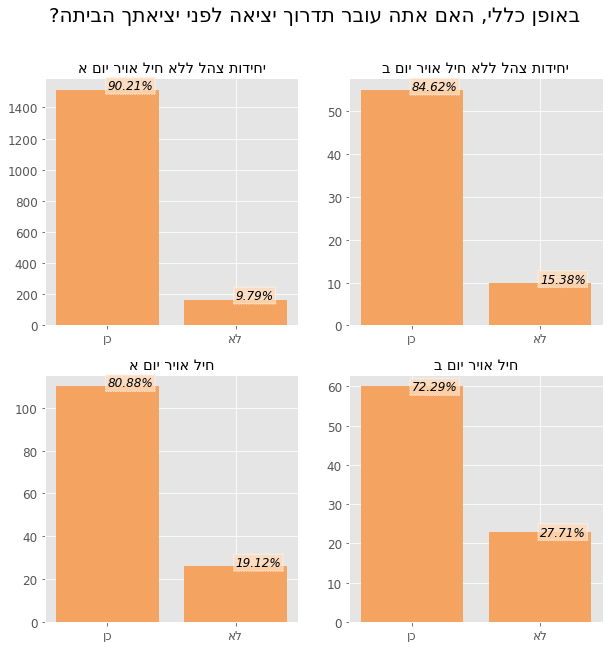

In [31]:
four_plot_nominal(12,'sandybrown','peachpuff')

# סוגי אמצעי תחבורה

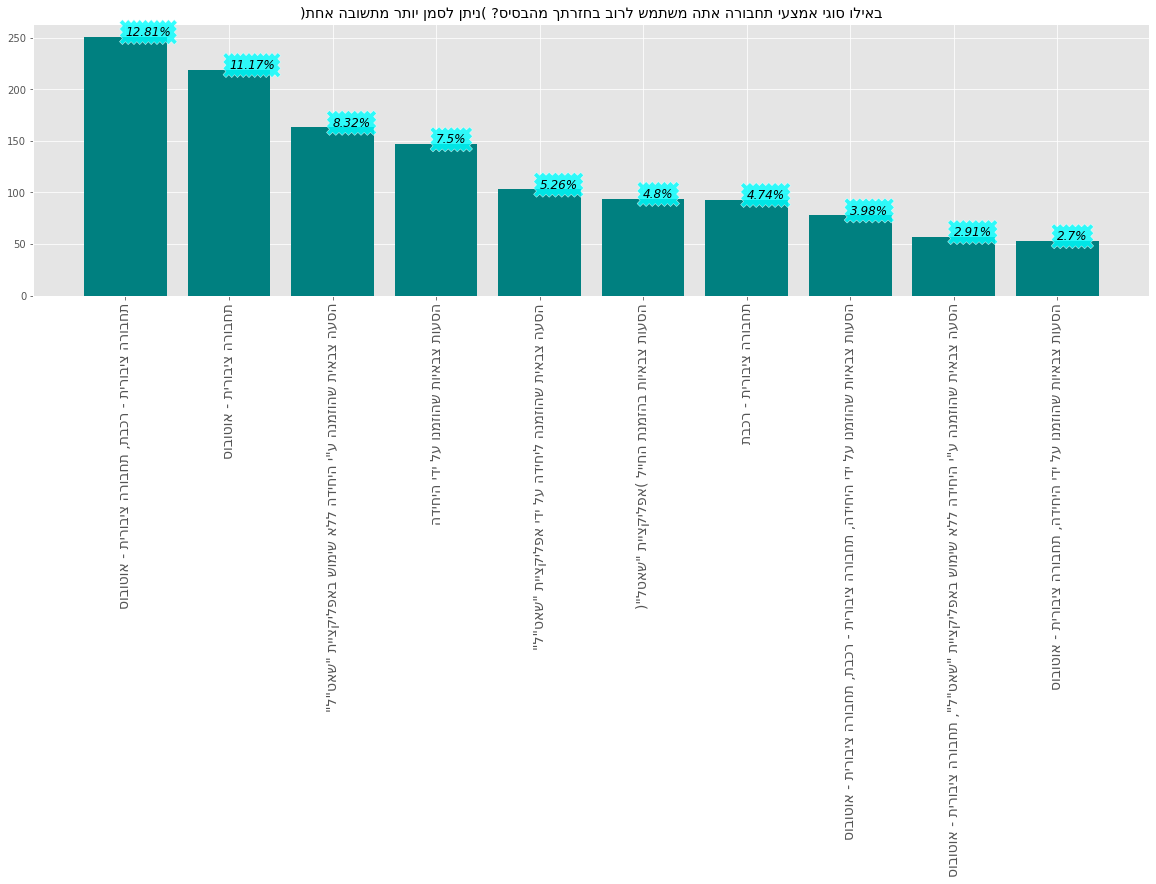

In [32]:
all_plot_nominal3(20,10)

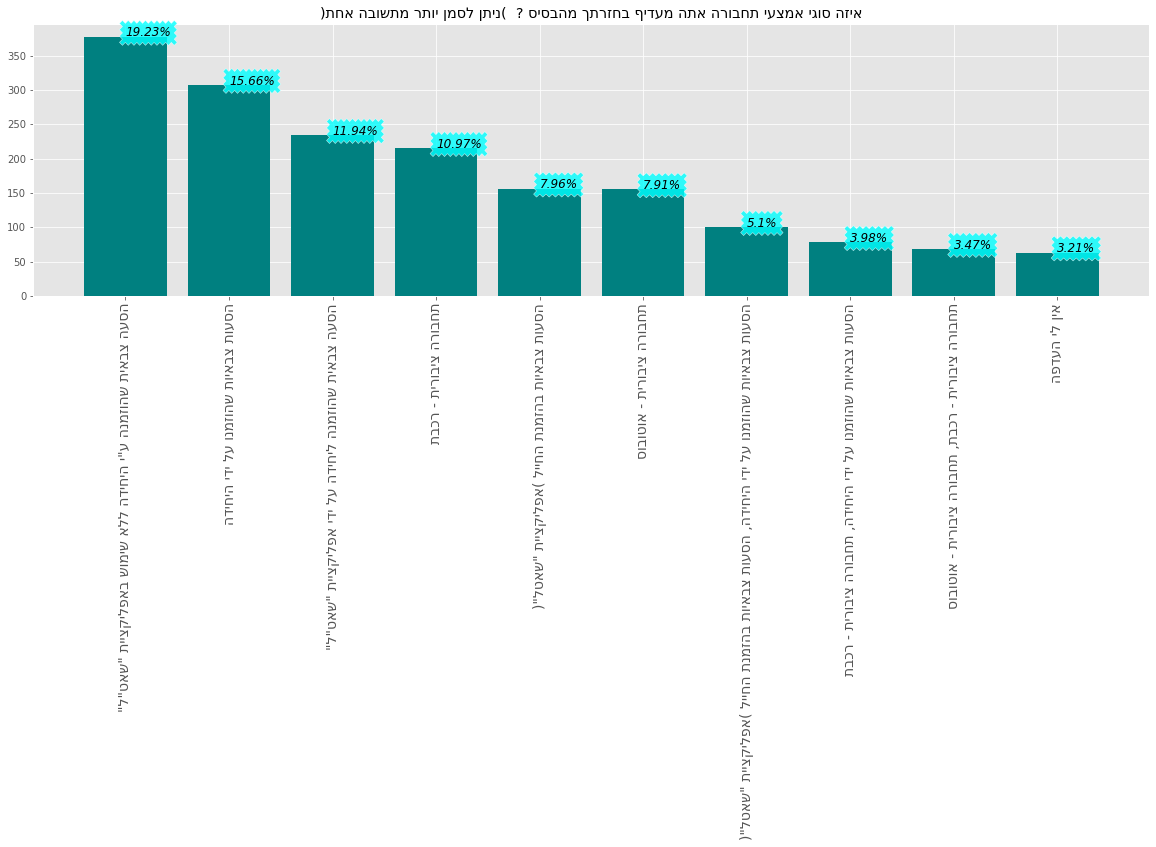

In [33]:
all_plot_nominal3(21,10)

C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


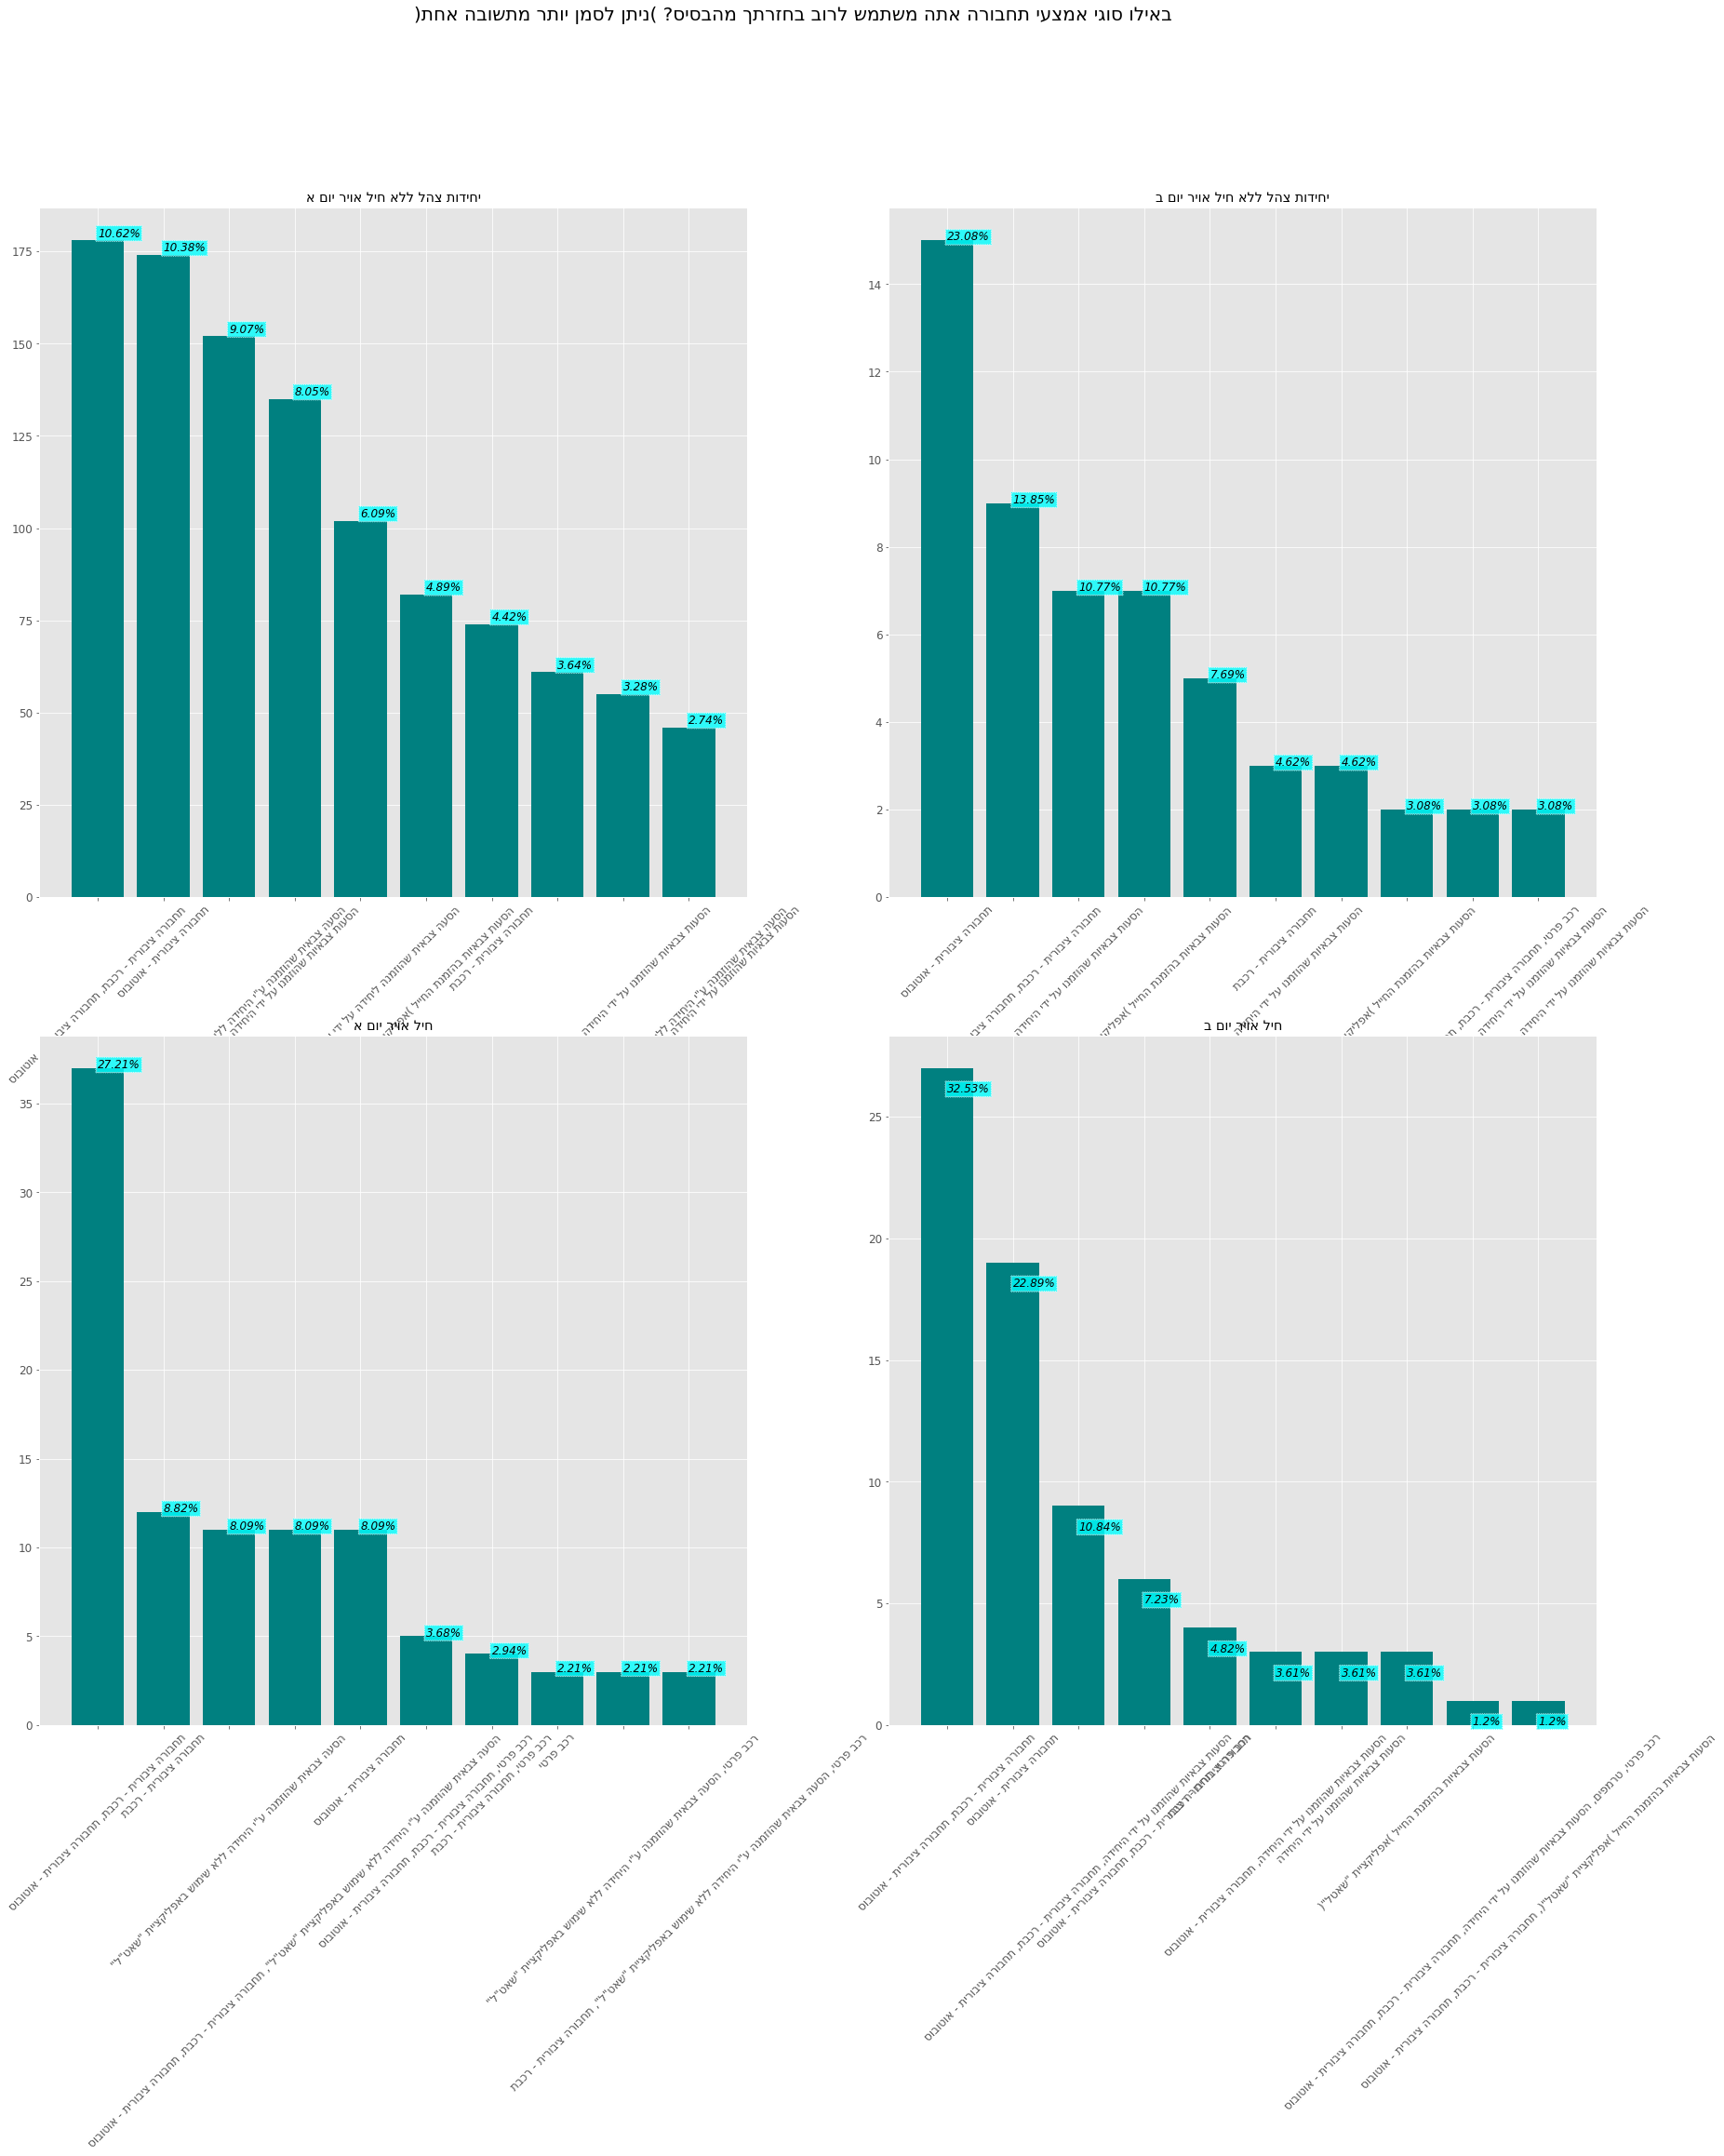

In [34]:
four_plot_nominal2(20,10,30,30)

# אמצעי תחבורה

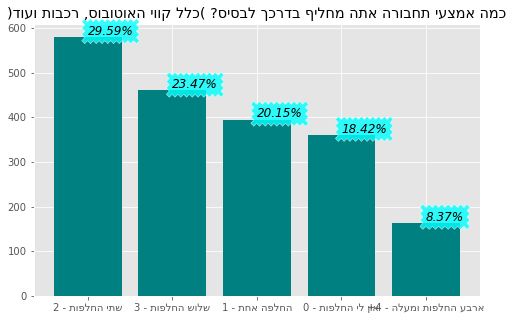

In [35]:
all_plot_nominal(18)

C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_14412/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


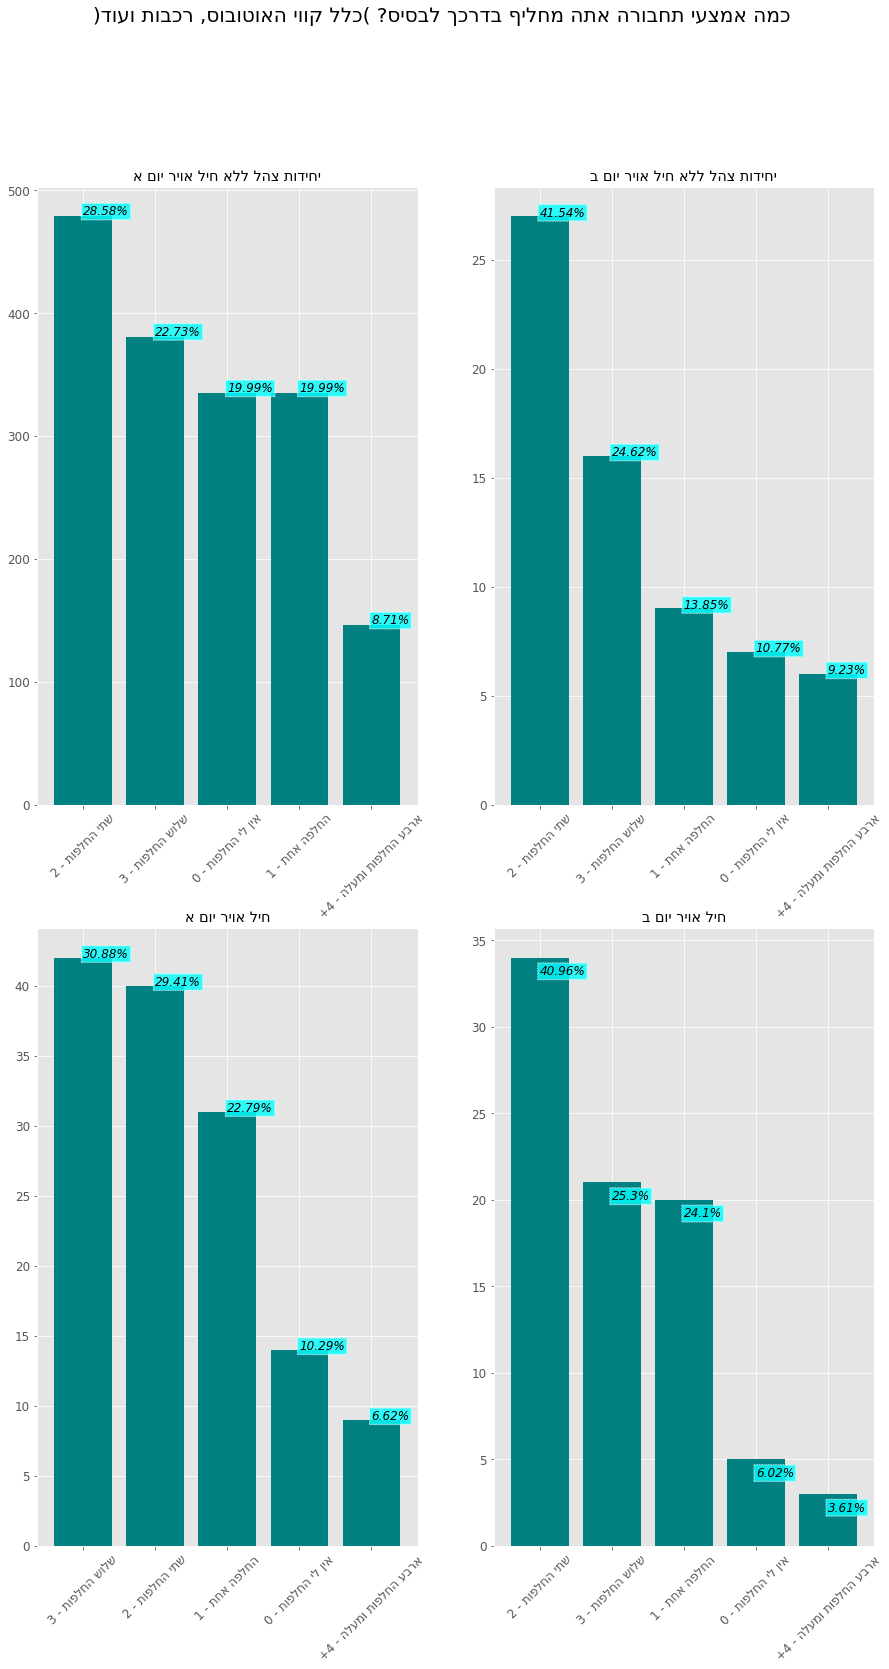

In [36]:
four_plot_nominal2(18,5,25,15)

# הכרה של שאט"ל + שביעות רצון הגעה וחזרה

In [37]:
df = all_data.groupby(by = all_data.columns[23]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                          count   
האם אתה מכיר את אפליקציית "שאטל"?                                                 
כן                                                                         1147   
לא                                                                          807   

                                             \
                                       mean   
האם אתה מכיר את אפליקציית "שאטל"?             
כן                                 3.619006   
לא                                 3.415118   

                                  באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                           count   
האם אתה מכיר את אפליקציית "שאטל"?                                                  
כן                                                                          1147   
לא                                                                           807   

                                             
                                       mean  
האם אתה מכיר את אפליקציית "שאטל"?            
כן                                 3.700087  
לא                                 3.456010

# שימוש שאט"ל + שביעות רצון הגעה וחזרה

In [38]:
df = all_data.groupby(by = all_data.columns[24]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                         count   
האם אתה משתמש באפליקציית "שאטל"?                                                 
לא                                                                        1365   
כן                                                                         595   

                                            \
                                      mean   
האם אתה משתמש באפליקציית "שאטל"?             
לא                                3.389011   
כן                                3.875630   

                                 באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                          count   
האם אתה משתמש באפליקציית "שאטל"?                                                  
לא                                                                         1365   
כן                                                                          595   

                                            
                                      mean  
האם אתה משתמש באפליקציית "שאטל"?            
לא                                3.460806  
כן                                3.926050

# הורדת שאט"ל שאט"ל + שביעות רצון הגעה וחזרה

In [39]:
df = all_data.groupby(by = all_data.columns[25]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                       count   
האם הורדת את אפליקציית "שאטל"?                                                 
לא                                                                       930   
כן                                                                       883   
הורדתי ומחקתי                                                            147   

                                          \
                                    mean   
האם הורדת את אפליקציית "שאטל"?             
לא                              3.411828   
כן                              3.722537   
הורדתי ומחקתי                   3.210884   

                               באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                        count   
האם הורדת את אפליקציית "שאטל"?                                                  
לא                                                                        930   
כן                                                                        883   
הורדתי ומחקתי                                                             147   

                                          
                                    mean  
האם הורדת את אפליקציית "שאטל"?            
לא                              3.450538  
כן                              3.819932  
הורדתי ומחקתי                   3.251701

In [40]:
df = all_data.groupby(by = all_data.columns[28]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                                           count   
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?                                                 
5.0                                                                                          260   
4.0                                                                                          183   
3.0                                                                                           86   
2.0                                                                                           40   
1.0                                                                                           26   

                                                              \
                                                        mean   
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?             
5.0                                                 4.307692   
4.0                                                 3.710383   
3.0                                                 3.523256   
2.0                                                 3.025000   
1.0                                                 3.192308   

                                                   באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                                            count   
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?                                                  
5.0                                                                                           260   
4.0                                                                                           183   
3.0                                                                                            86   
2.0                                                                                            40   
1.0                                                                                            26   

                                                              
                                                        mean  
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?            
5.0                                                 4.373077  
4.0                                                 3.912568  
3.0                                                 3.441860  
2.0                                                 2.725000  
1.0                                                 3.000000

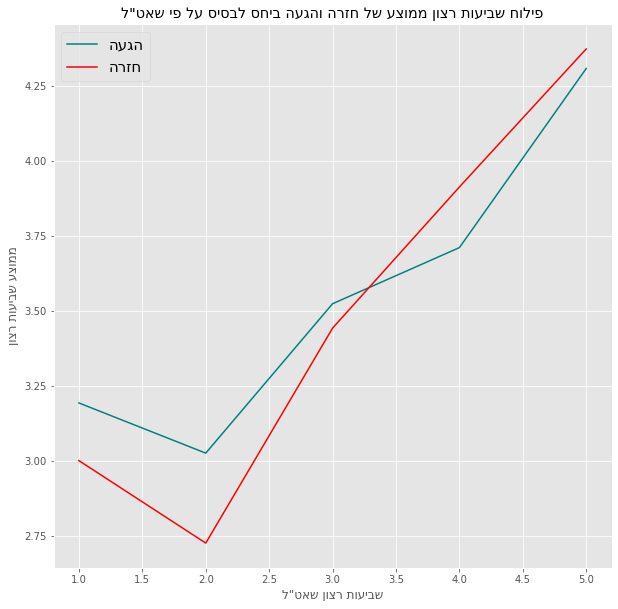

In [41]:
x = df.index.tolist()
y1 = df.iloc[:,1].tolist()
y2 = df.iloc[:,3].tolist()
plt.figure(figsize = (10,10))
plt.plot(x,y1, color = 'teal')
plt.plot(x,y2, color = 'red')
plt.title('פילוח שביעות רצון ממוצע של חזרה והגעה ביחס לבסיס על פי שאט"ל'[::-1])
plt.xlabel('שביעות רצון שאט"ל'[::-1])
plt.ylabel('ממוצע שביעות רצון'[::-1])
plt.legend(labels = ["הגעה"[::-1],"חזרה"[::-1]], fontsize = 15)
plt.show()

# הוגדר הגעה לבסיס

In [42]:
"""
import datetime
plt.figure(figsize = (25,5))
x = pd.to_datetime(all_data.iloc[:,8],format='%H%M%S', errors='ignore')
x = x.value_counts().sort_index()
plt.xticks(rotation = 90)
plt.plot(x)
plt.title(all_data.columns[8][::-1])
plt.axvline(x='07:00:00',linestyle = '--', color = 'teal')
plt.text('08:00:00', 100,'בוקר'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='09:30:00',linestyle = '--', color = 'teal')
plt.text('10:30:00', 100,'צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='12:00:00',linestyle = '--', color = 'teal')
plt.text('13:12:00', 100,'אחר צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='16:00:00',linestyle = '--', color = 'teal')
plt.show()
"""

'\nimport datetime\nplt.figure(figsize = (25,5))\nx = pd.to_datetime(all_data.iloc[:,8],format=\'%H%M%S\', errors=\'ignore\')\nx = x.value_counts().sort_index()\nplt.xticks(rotation = 90)\nplt.plot(x)\nplt.title(all_data.columns[8][::-1])\nplt.axvline(x=\'07:00:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'08:00:00\', 100,\'בוקר\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'09:30:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'10:30:00\', 100,\'צהריים\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'12:00:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'13:12:00\', 100,\'אחר צהריים\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'16:00:0

#  מעריך הגעה לבסיס

In [43]:
"""
import datetime
plt.figure(figsize = (25,5))
x = pd.to_datetime(all_data.iloc[:,9],format='%H%M%S', errors='ignore')
x = x.value_counts().sort_index()
plt.xticks(rotation = 90)
plt.plot(x)

plt.axvline(x='07:00:00',linestyle = '--', color = 'teal')
plt.text('08:00:00', 100,'בוקר'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='09:30:00',linestyle = '--', color = 'teal')
plt.text('10:30:00', 100,'צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='12:00:00',linestyle = '--', color = 'teal')
plt.text('12:30:00', 100,'אחר צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='16:00:00',linestyle = '--', color = 'teal')
plt.title(all_data.columns[9][::-1])
plt.show()
"""

'\nimport datetime\nplt.figure(figsize = (25,5))\nx = pd.to_datetime(all_data.iloc[:,9],format=\'%H%M%S\', errors=\'ignore\')\nx = x.value_counts().sort_index()\nplt.xticks(rotation = 90)\nplt.plot(x)\n\nplt.axvline(x=\'07:00:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'08:00:00\', 100,\'בוקר\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'09:30:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'10:30:00\', 100,\'צהריים\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'12:00:00\',linestyle = \'--\', color = \'teal\')\nplt.text(\'12:30:00\', 100,\'אחר צהריים\'[::-1],size=15,style = \'italic\',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor=\'white\', boxstyle=\'Sawtooth,pad=0.5\'))\nplt.axvline(x=\'16:00:00\',linestyle = \'--\', color = \'te

# חלוקת זמן למקום הגעה

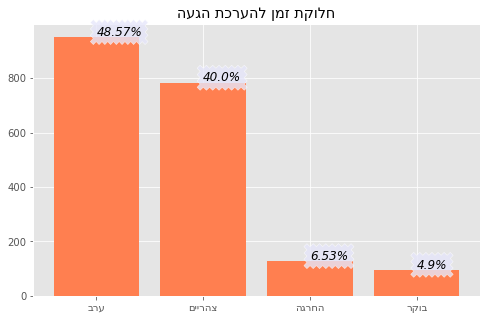

In [44]:
all_plot_nominal(38,plot_color = 'coral',text_color ='lavender')

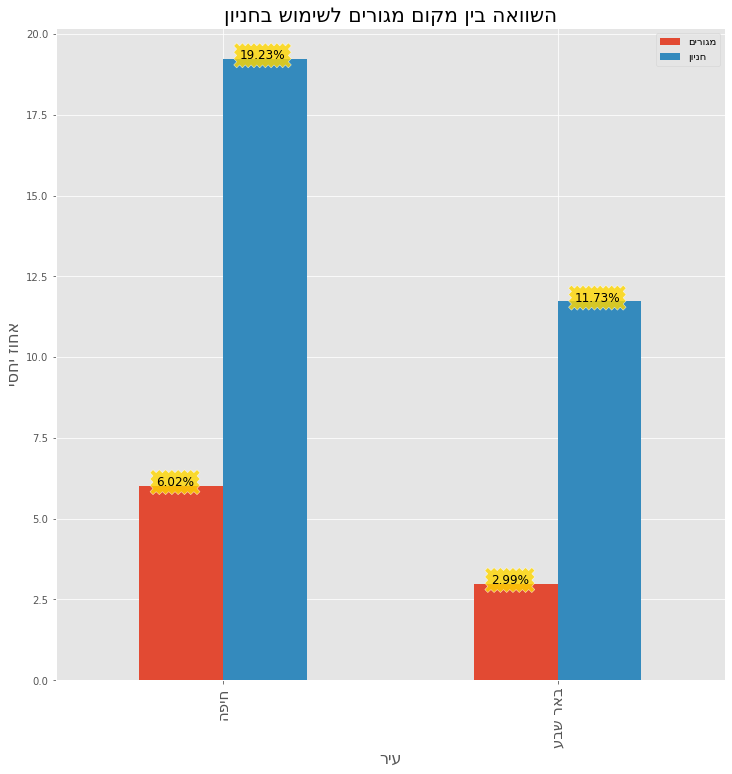

In [45]:

henion = [all_data[all_data.columns[5]].value_counts(normalize = True)["חניון חוף זמיר חיפה"],
           all_data[all_data.columns[5]].value_counts(normalize = True)["תחנה מרכזית באר שבע"]]

megurim = [all_data[all_data.columns[3]].value_counts(normalize = True)["חיפה"],
          all_data[all_data.columns[3]].value_counts(normalize = True)["באר שבע"]]
labels =  [label[::-1] for label in ["חיפה","באר שבע"]]
df = pd.DataFrame({"עיר"[::-1]:labels,"מגורים"[::-1]:[round(r*100,2) for r in megurim],"חניון"[::-1]:[round(r*100,2) for r in henion]})
df.plot(x=df.columns[0], y=df.columns[1:3], kind="bar",figsize = (12,12))
plt.title("השוואה בין מקום מגורים לשימוש בחניון"[::-1], size = 20)
plt.text(0.05,df.iloc[0,2],f"{df.iloc[0,2]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.text(-0.2,df.iloc[0,1],f"{df.iloc[0,1]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.text(1.05,df.iloc[1,2],f"{df.iloc[1,2]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.text(0.8,df.iloc[1,1],f"{df.iloc[1,1]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.ylabel("אחוז יחסי"[::-1],size =16)
plt.xticks(size = 15)
plt.xlabel(df.columns[0],size =16)

plt.show()

# הצלבה בין ערים לחניונים

In [46]:
megurim_henion = pd.crosstab(all_data[all_data.columns[3]],all_data[all_data.columns[5]])
megurim_henion.columns = [i[::-1] for i in megurim_henion.columns]

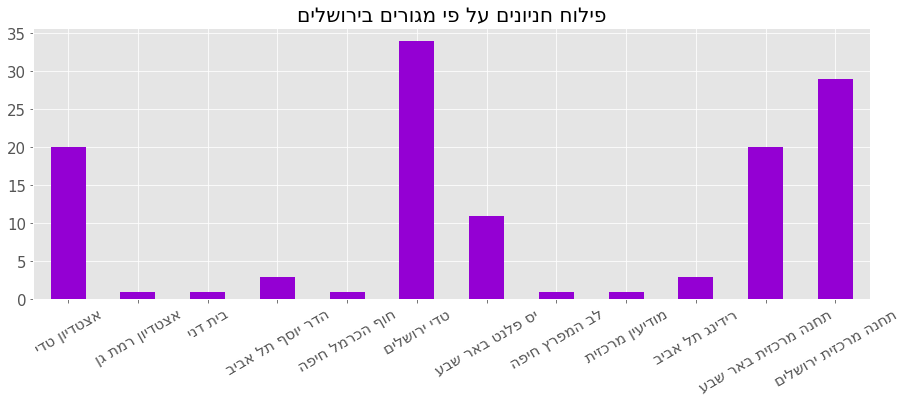

In [47]:
r = "ירושלים"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1], size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

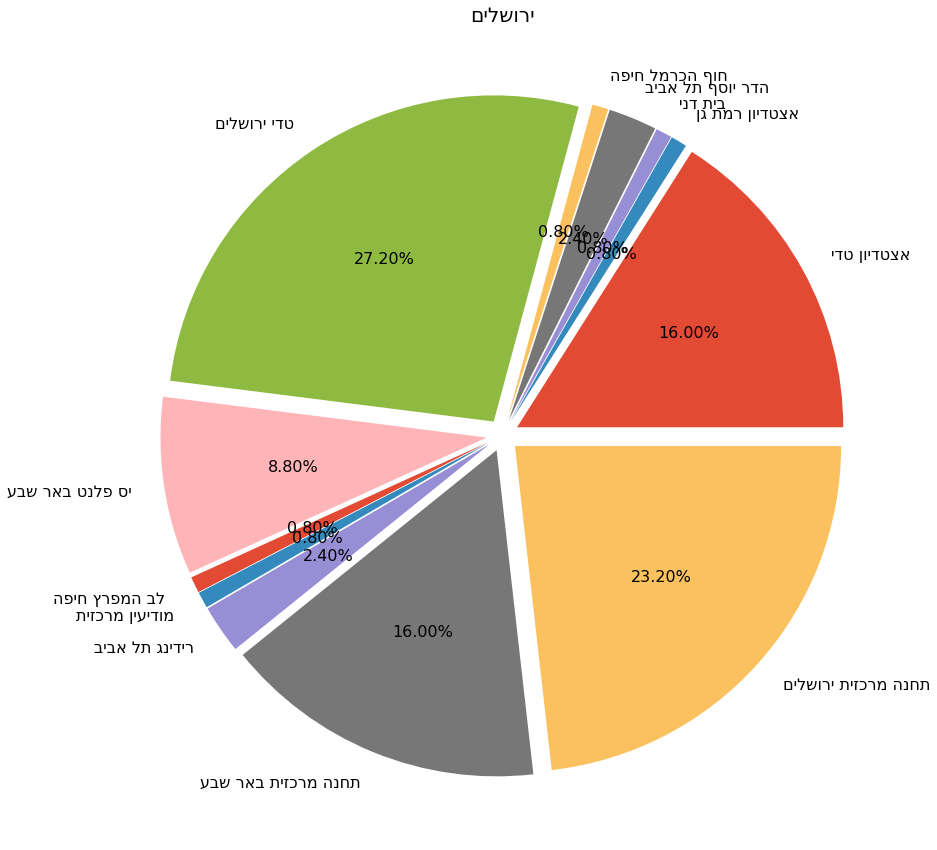

In [48]:
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "pie", figsize = (15,15), autopct='%0.2f%%',explode=[0.05]*12,textprops={'fontsize': 16})
plt.ylabel("")
plt.title(r[::-1],size= 20)
plt.show()

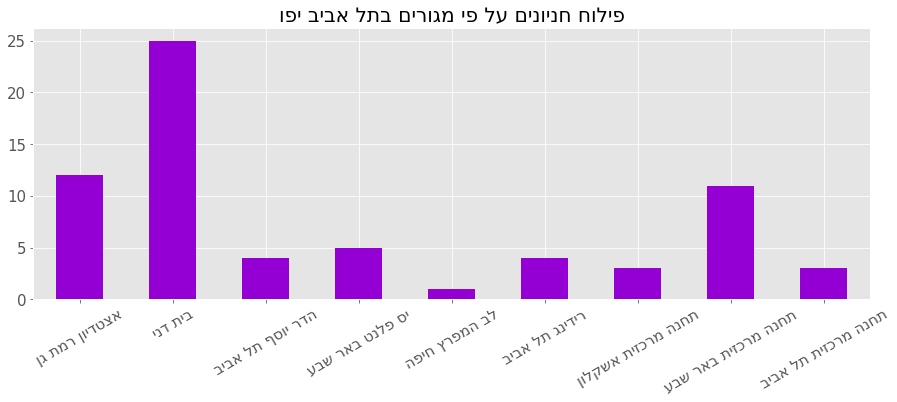

In [49]:
r = "תל אביב יפו"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

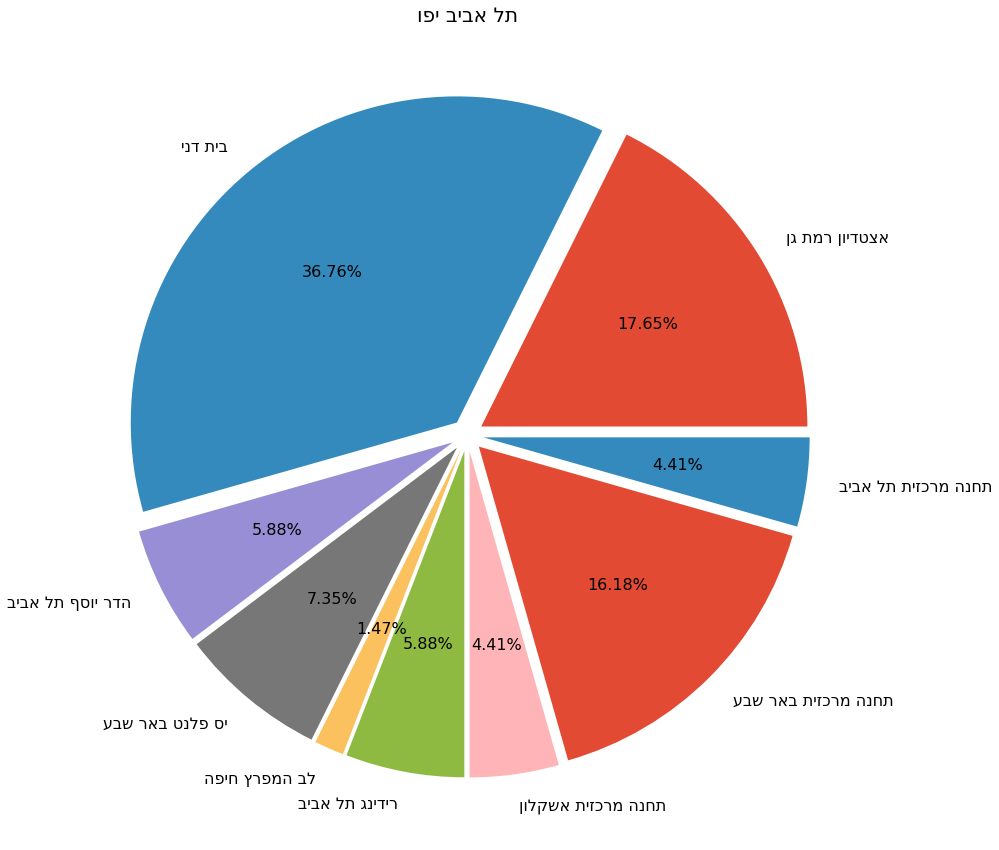

In [50]:
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "pie", figsize = (15,15), autopct='%0.2f%%',explode=[0.05]*9,textprops={'fontsize': 16})
plt.ylabel("")
plt.title(r[::-1],size= 20)
plt.show()

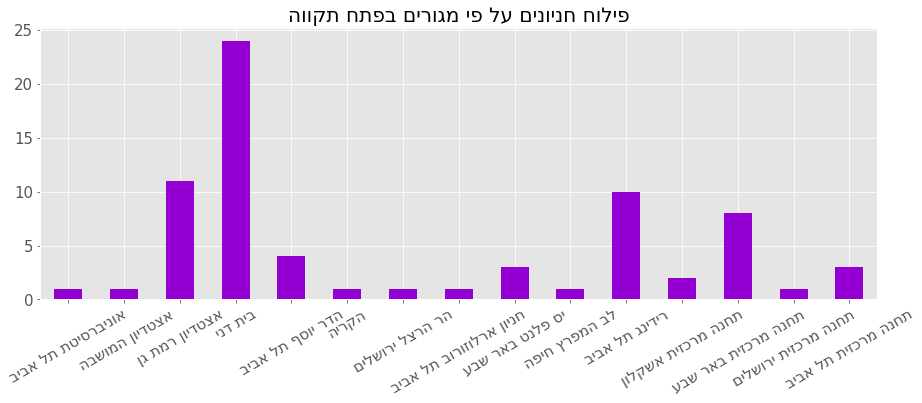

In [51]:
r = "פתח תקווה"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

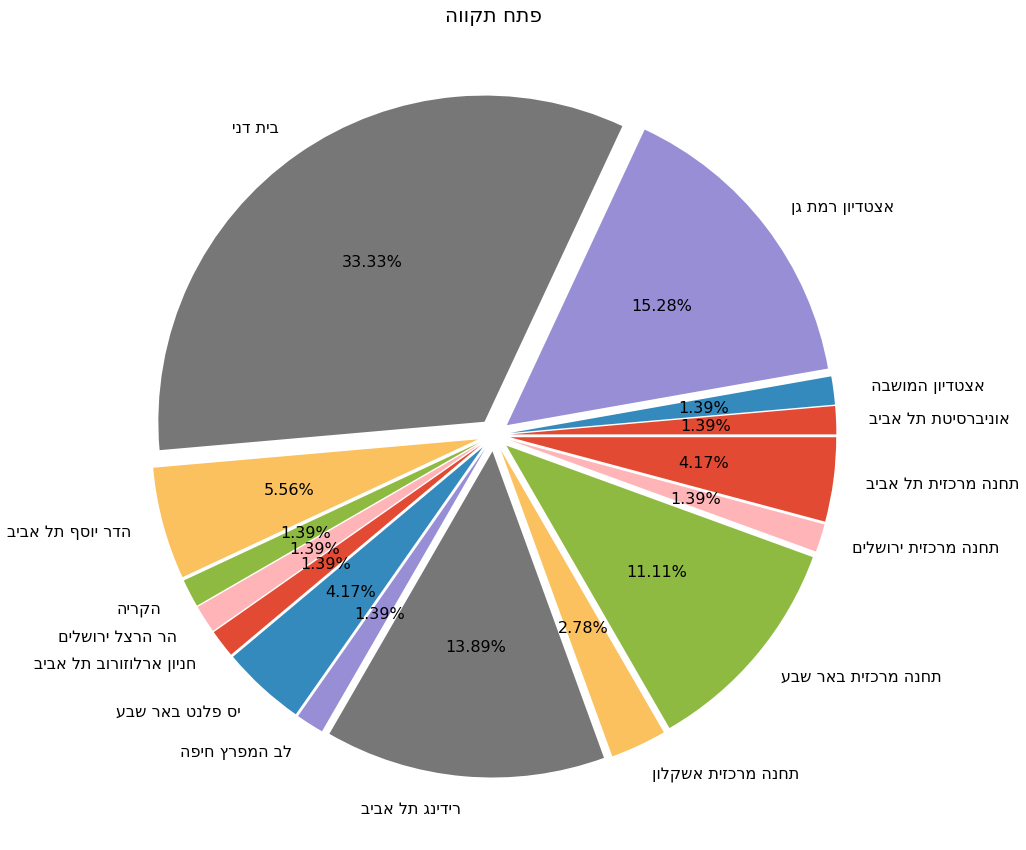

In [52]:
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "pie", figsize = (15,15), autopct='%0.2f%%',explode=[0.05]*15,textprops={'fontsize': 16})
plt.ylabel("")
plt.title(r[::-1],size= 20)
plt.show()

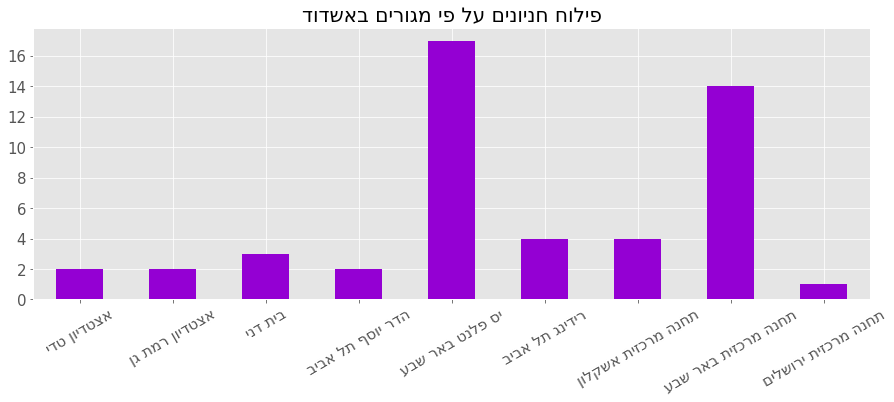

In [53]:
r = "אשדוד"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

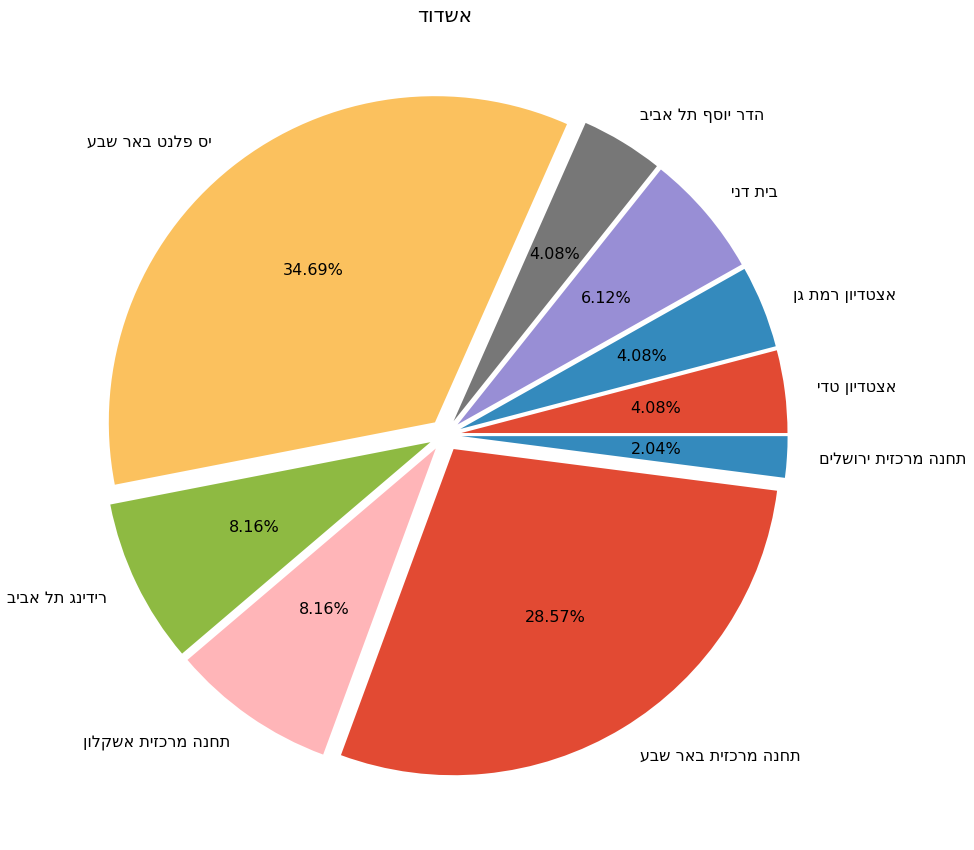

In [54]:
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "pie", figsize = (15,15), autopct='%0.2f%%',explode=[0.05]*9,textprops={'fontsize': 16})
plt.ylabel("")
plt.title(r[::-1],size= 20)
plt.show()

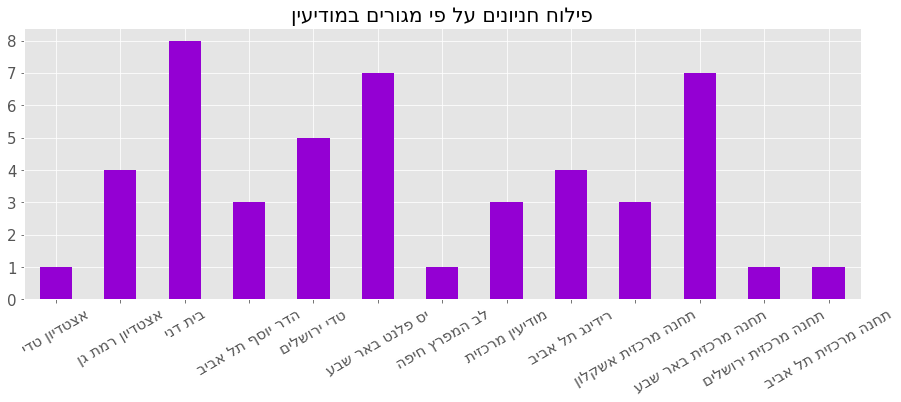

In [55]:
r = "מודיעין"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
#for j in range(len(megurim_henion.loc[r][megurim_henion.loc[r]>0].index.tolist())):
    #txt = f"{megurim_henion.loc[r][megurim_henion.loc[r]>0].value_counts()[j]}"
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

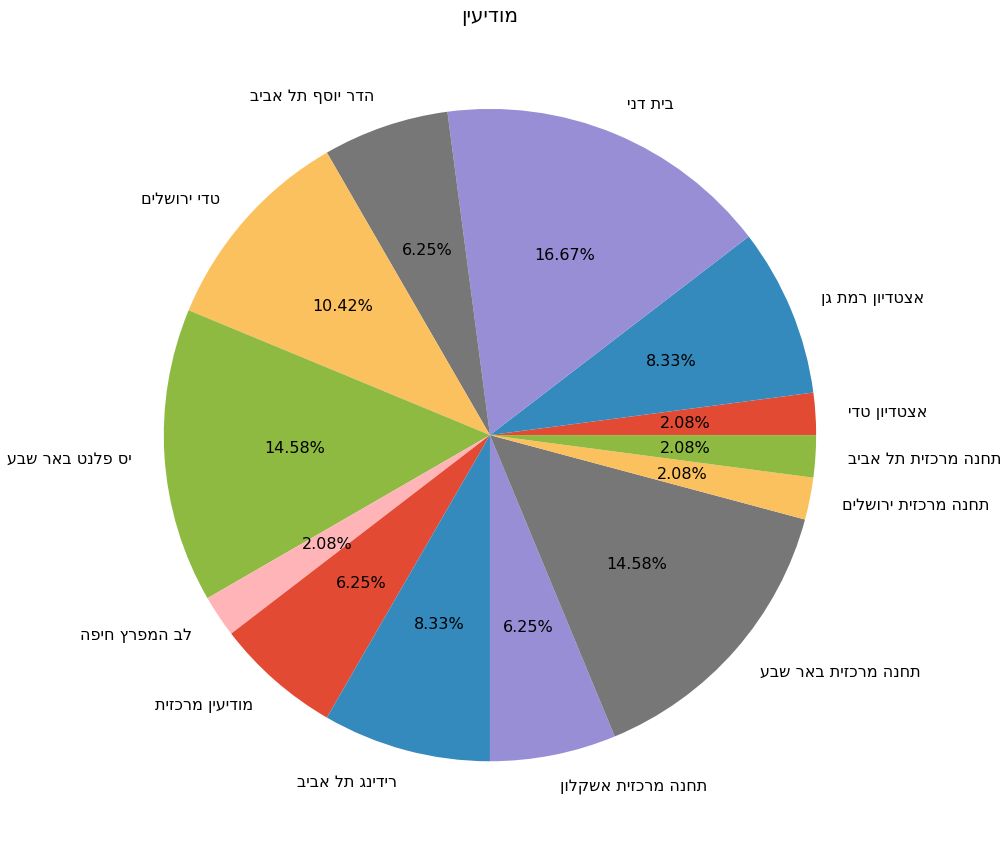

In [56]:
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "pie", figsize = (15,15), autopct='%0.2f%%',textprops={'fontsize': 16})
plt.ylabel("")
plt.title(r[::-1],size= 20)
plt.show()

# הצלבה בין חניונים לערים TOP 10

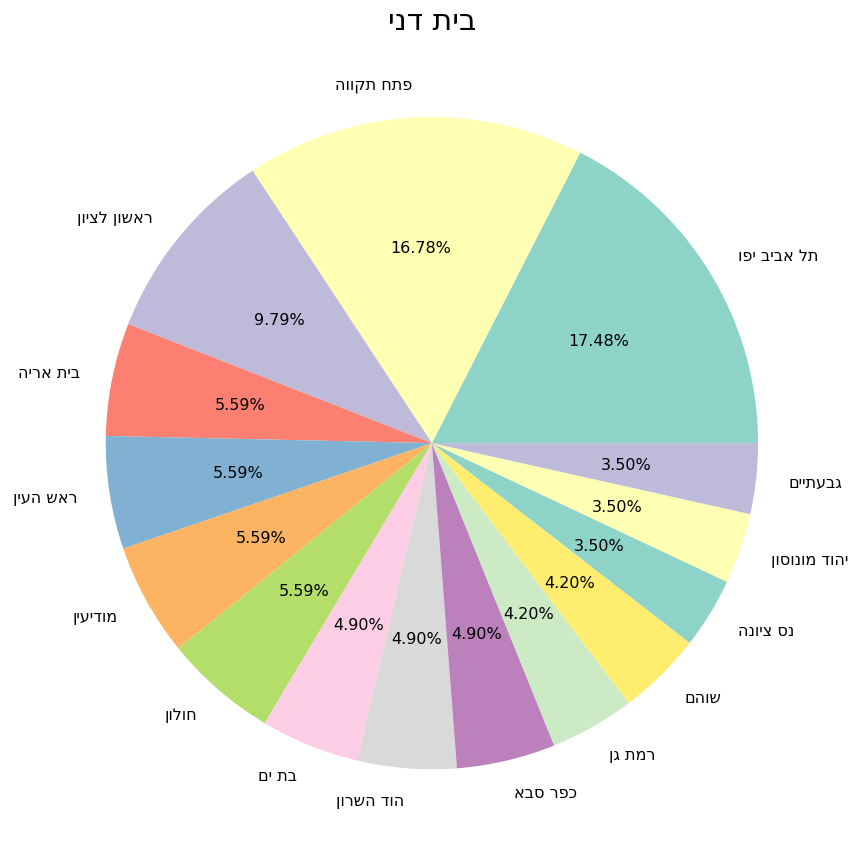

In [57]:
import seaborn as sns
r = "בית דני"
henion_megurim = pd.crosstab(all_data[all_data.columns[5]],all_data[all_data.columns[3]])
#henion_megurim.columns = [i[::-1] for i in henion_megurim.columns]
top10 = henion_megurim.loc[r][henion_megurim.loc[r]>0].sort_values(ascending = False)[:15]
top10.index = [i[::-1] for i in top10.index]
#define Seaborn color palette to use
colors = sns.color_palette('Set3')
top10.plot(kind = "pie",colors = colors, figsize = (15,15), autopct='%0.2f%%',textprops={'fontsize': 16})
plt.title(r[::-1],size = 30)
plt.ylabel(" ")
plt.show()

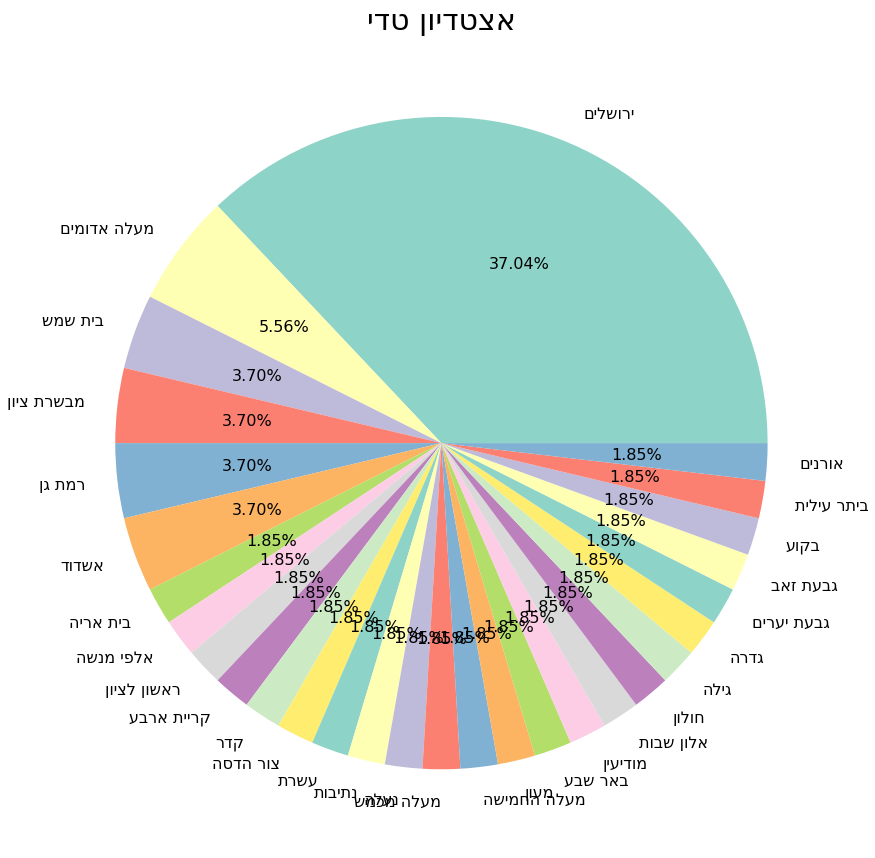

In [58]:
import seaborn as sns
r = "אצטדיון טדי"
henion_megurim = pd.crosstab(all_data[all_data.columns[5]],all_data[all_data.columns[3]])
#henion_megurim.columns = [i[::-1] for i in henion_megurim.columns]
top10 = henion_megurim.loc[r][henion_megurim.loc[r]>0].sort_values(ascending = False)[:]
top10.index = [i[::-1] for i in top10.index]
#define Seaborn color palette to use
colors = sns.color_palette('Set3')
top10.plot(kind = "pie",colors = colors, figsize = (15,15), autopct='%0.2f%%',textprops={'fontsize': 16})
plt.title(r[::-1],size = 30)
plt.ylabel(" ")
plt.show()

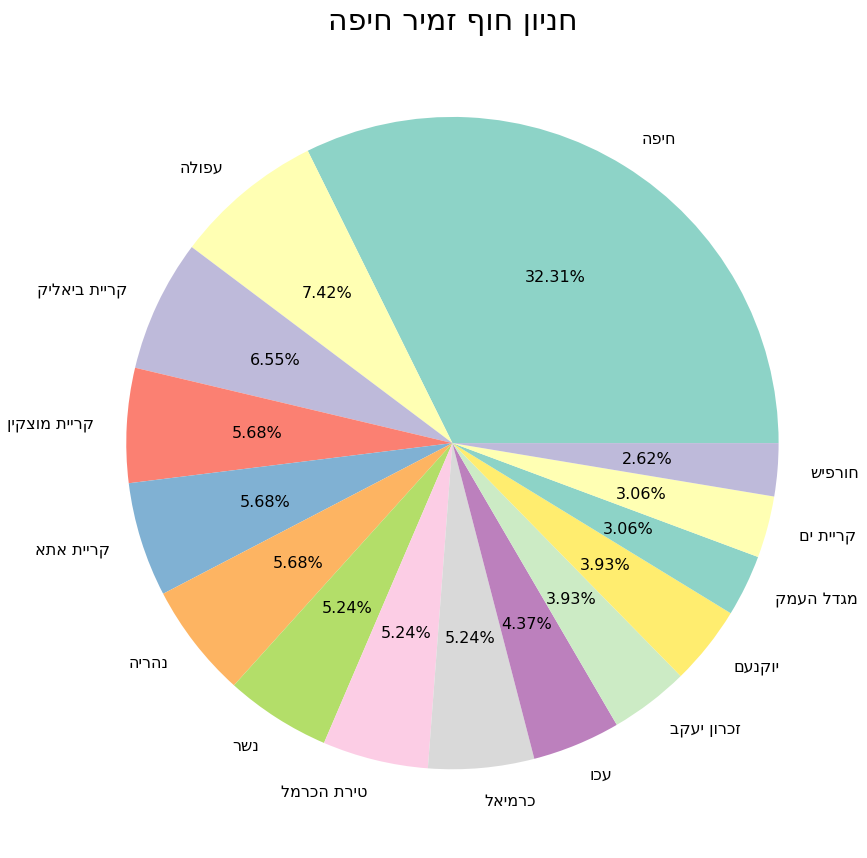

In [59]:
import seaborn as sns
r = "חניון חוף זמיר חיפה"
henion_megurim = pd.crosstab(all_data[all_data.columns[5]],all_data[all_data.columns[3]])
#henion_megurim.columns = [i[::-1] for i in henion_megurim.columns]
top10 = henion_megurim.loc[r][henion_megurim.loc[r]>0].sort_values(ascending = False)[:15]
top10.index = [i[::-1] for i in top10.index]
#define Seaborn color palette to use
colors = sns.color_palette('Set3')
top10.plot(kind = "pie",colors = colors, figsize = (15,15), autopct='%0.2f%%',textprops={'fontsize': 16})
plt.title(r[::-1],size = 30)
plt.ylabel(" ")
plt.show()

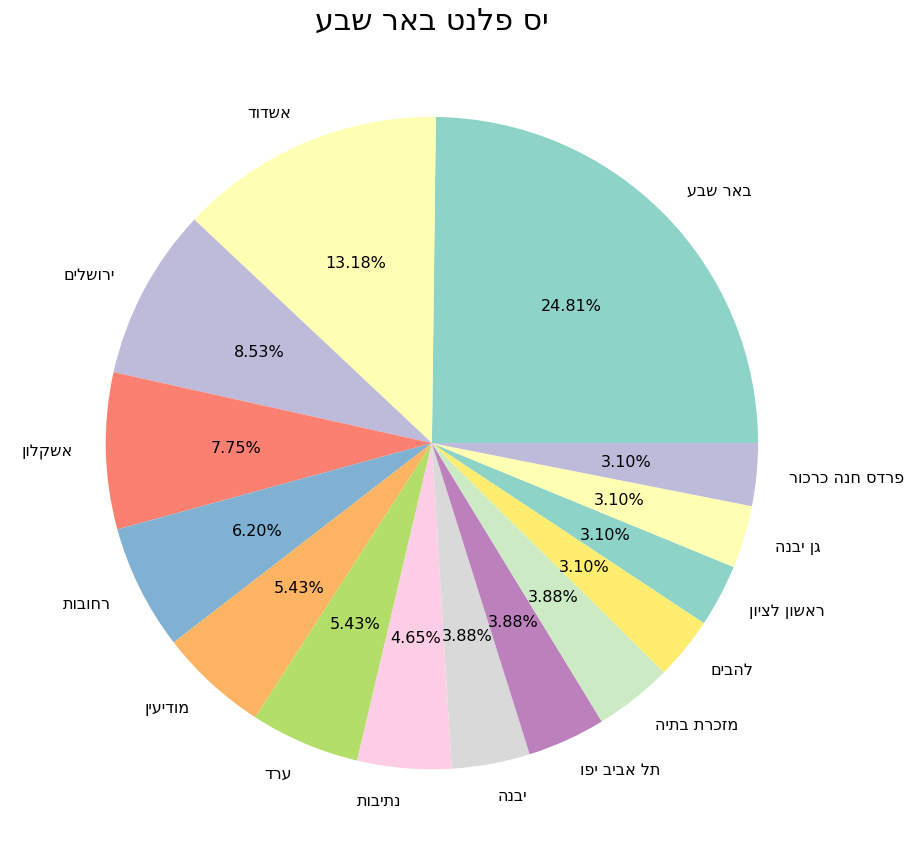

In [60]:
import seaborn as sns
r = "יס פלנט באר שבע"
henion_megurim = pd.crosstab(all_data[all_data.columns[5]],all_data[all_data.columns[3]])
#henion_megurim.columns = [i[::-1] for i in henion_megurim.columns]
top10 = henion_megurim.loc[r][henion_megurim.loc[r]>0].sort_values(ascending = False)[:15]
top10.index = [i[::-1] for i in top10.index]
#define Seaborn color palette to use
colors = sns.color_palette('Set3')
top10.plot(kind = "pie",colors = colors, figsize = (15,15), autopct='%0.2f%%',textprops={'fontsize': 16})
plt.title(r[::-1],size = 30)
plt.ylabel(" ")
plt.show()

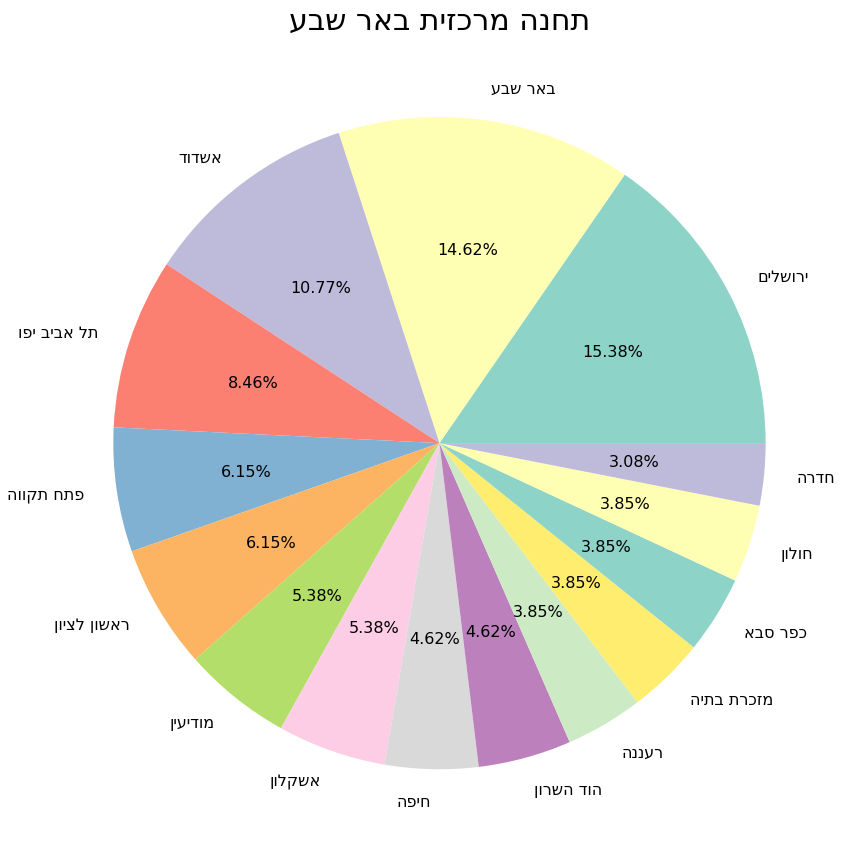

In [61]:
import seaborn as sns
r = "תחנה מרכזית באר שבע"
henion_megurim = pd.crosstab(all_data[all_data.columns[5]],all_data[all_data.columns[3]])
#henion_megurim.columns = [i[::-1] for i in henion_megurim.columns]
top10 = henion_megurim.loc[r][henion_megurim.loc[r]>0].sort_values(ascending = False)[:15]
top10.index = [i[::-1] for i in top10.index]
#define Seaborn color palette to use
colors = sns.color_palette('Set3')
top10.plot(kind = "pie",colors = colors, figsize = (15,15), autopct='%0.2f%%',textprops={'fontsize': 16})
plt.title(r[::-1],size = 30)
plt.ylabel(" ")
plt.show()

# הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לתחנת הסעה

In [62]:
df = all_data.groupby(by = [all_data.columns[3],all_data.columns[5]]).agg(['sum']).iloc[:,4:5]
df.to_csv('הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לתחנת הסעה.csv')

# הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לכמה אמצעי תחבורה מחליף

In [63]:
df = all_data.groupby(by = [all_data.columns[3],all_data.columns[5],all_data.columns[7]]).agg(['sum']).iloc[:,14:15]
df.to_csv('הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לכמה אמצעי תחבורה מחליף.csv')

# הצלבה בין תדרוך יציאה להנחיות הגעה

In [64]:
round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

באופן כללי האם אתה מקבל הנחיות הגעה לבסיס?  (בתדרוך היציאה/ בכלל)     כן  \
באופן כללי, האם אתה עובר תדרוך יציאה לפני יציאת...                         
כן                                                                 69.10   
לא                                                                  1.89   
All                                                                70.99   

באופן כללי האם אתה מקבל הנחיות הגעה לבסיס?  (בתדרוך היציאה/ בכלל)     לא  \
באופן כללי, האם אתה עובר תדרוך יציאה לפני יציאת...                         
כן                                                                 21.84   
לא                                                                  7.17   
All                                                                29.01   

באופן כללי האם אתה מקבל הנחיות הגעה לבסיס?  (בתדרוך היציאה/ בכלל)     All  
באופן כללי, האם אתה עובר תדרוך יציאה לפני יציאת...                         
כן                                                                  90.94  
לא                                                                   9.06  
All                                                                100.00

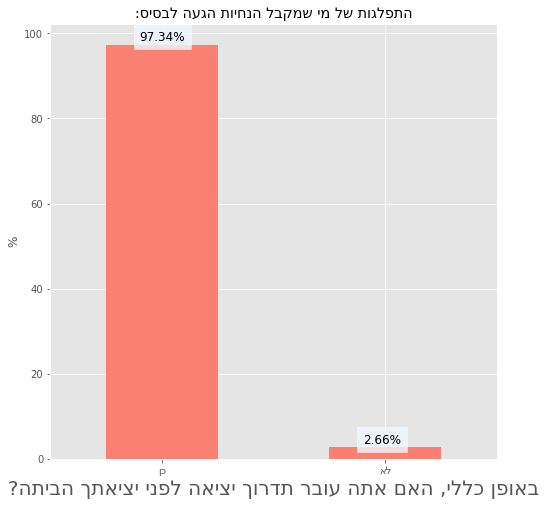

In [65]:
df = round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

x1 = round(df.iloc[:2,0]/df.iloc[2,0]*100,2)
plt.figure(figsize = (8,8) )
x1.plot(kind = 'bar', color = 'salmon')
title = "התפלגות של מי שמקבל הנחיות הגעה לבסיס:"
plt.xticks(ticks = [0,1], labels = [a[::-1] for a in df.index[:2].tolist()], rotation= 0)
plt.xlabel(f"{df.index.name}"[::-1],size = 20)
plt.ylabel("%")
plt.title(title[::-1])
for i in range(2):
    plt.text(i-0.1,x1[i]+1,f"{x1[i]}%",size=12,bbox=dict(facecolor="aliceblue",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))

plt.show()

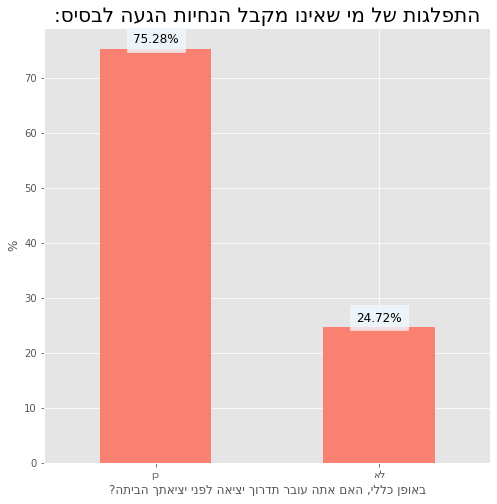

In [66]:
df = round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

x1 = round(df.iloc[:2,1]/df.iloc[2,1]*100,2)
plt.figure(figsize = (8,8) )
x1.plot(kind = 'bar', color = 'salmon')
title = "התפלגות של מי שאינו מקבל הנחיות הגעה לבסיס:"
plt.xticks(ticks = [0,1], labels = [a[::-1] for a in df.index[:2].tolist()], rotation= 0)
plt.xlabel(f"{df.index.name}"[::-1])
plt.ylabel("%")
plt.title(title[::-1],size = 20)
for i in range(2):
    plt.text(i-0.1,x1[i]+1,f"{x1[i]}%",size=12,bbox=dict(facecolor="aliceblue",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))


plt.show()

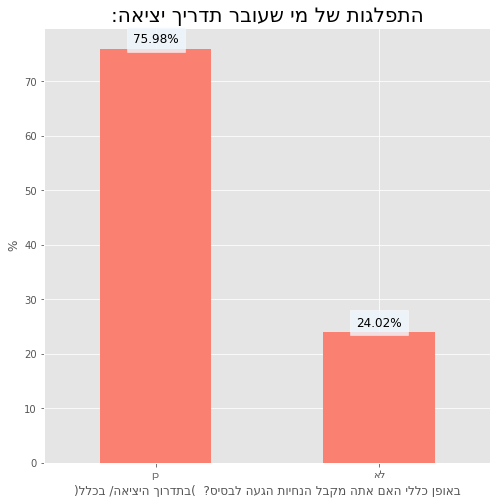

In [67]:
df = round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

x1 = round(df.iloc[0,:2]/df.iloc[0,2]*100,2)
plt.figure(figsize = (8,8) )
x1.plot(kind = 'bar', color = 'salmon')
title = "התפלגות של מי שעובר תדריך יציאה:"
plt.xticks(ticks = [0,1], labels = [a[::-1] for a in df.index[:2].tolist()], rotation= 0)
plt.xlabel(f"{df.columns.name}"[::-1])
plt.ylabel("%")
plt.title(title[::-1],size = 20)
for i in range(2):
    plt.text(i-0.1,x1[i]+1,f"{x1[i]}%",size=12,bbox=dict(facecolor="aliceblue",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))


plt.show()

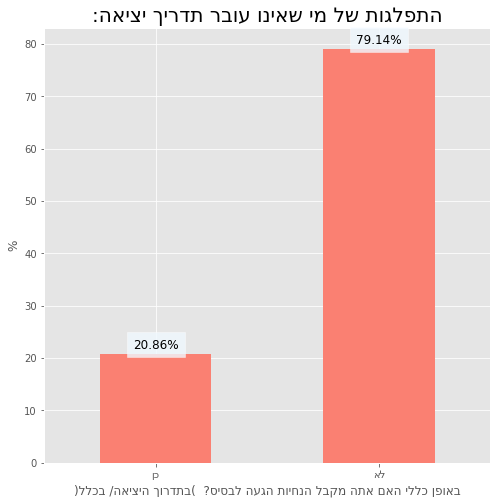

In [68]:
df = round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

x1 = round(df.iloc[1,:2]/df.iloc[1,2]*100,2)
plt.figure(figsize = (8,8) )
x1.plot(kind = 'bar', color = 'salmon')
title = "התפלגות של מי שאינו עובר תדריך יציאה:"
plt.xticks(ticks = [0,1], labels = [a[::-1] for a in df.index[:2].tolist()], rotation= 0)
plt.xlabel(f"{df.columns.name}"[::-1])
plt.ylabel("%")
plt.title(title[::-1],size = 20)
for i in range(2):
    plt.text(i-0.1,x1[i]+1,f"{x1[i]}%",size=12,bbox=dict(facecolor="aliceblue",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))


plt.show()

# הצלבה בין כמה מכירים שאט"ל כמה הורידו וכמה משתמשים
גרף של שלושתם

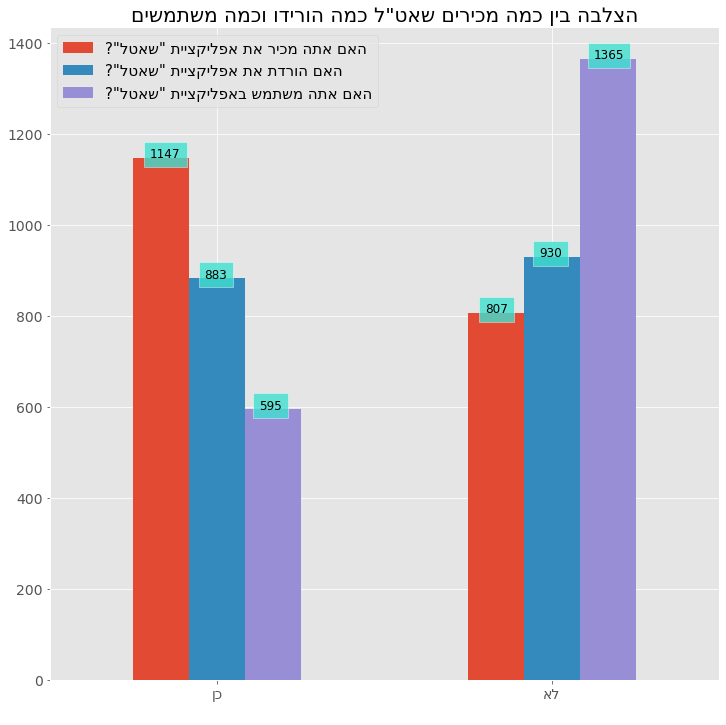

In [69]:
y = all_data[all_data.columns[23]].value_counts().sort_index().index.tolist()[:2]
x1 = all_data[all_data.columns[23]].value_counts().sort_index().tolist()[:2]
x2 = all_data[all_data.columns[24]].value_counts().sort_index().tolist()[:2]
x3 = all_data[all_data.columns[25]].value_counts().sort_index().tolist()[1:3]

df = pd.DataFrame({"כן/לא"[::-1]:[label[::-1] for label in y],all_data.columns[23][::-1]:x1,all_data.columns[24][::-1]:x2,all_data.columns[25][::-1]:x3})
df.plot(x=df.columns[0], y=[df.columns[1],df.columns[3],df.columns[2]], kind="bar",figsize = (12,12))
plt.xticks(rotation = 0, size = 12)
title = 'הצלבה בין כמה מכירים שאט"ל כמה הורידו וכמה משתמשים'
plt.title(title[::-1], size= 20)
plt.legend(fontsize = 15)
#plt.text(-0.2,650,"*הורידו ומחקו: 17"[::-1], fontsize = 20)
plt.text(0.125,df.iloc[0,2],f"{df.iloc[0,2]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.0375,df.iloc[0,3],f"{df.iloc[0,3]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.2,df.iloc[0,1],f"{df.iloc[0,1]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))

plt.text(1.125,df.iloc[1,2],f"{df.iloc[1,2]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.0375 + 1,df.iloc[1,3],f"{df.iloc[1,3]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.2 + 1,df.iloc[1,1],f"{df.iloc[1,1]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlabel(' ')
plt.show()

# תדירות שימוש

In [70]:
round(pd.crosstab(all_data[all_data.columns[29]],all_data[all_data.columns[24]],normalize = True)*100,2)

האם אתה משתמש באפליקציית "שאטל"?       כן
באיזו תדירות אתה משתמש באפליקצייה?       
1.0                                  5.88
2.0                                  8.07
3.0                                 20.00
4.0                                 21.68
5.0                                 44.37

In [71]:
all_data.groupby([all_data.columns[5],all_data.columns[11]]).agg('count')

חותמת זמן  \
מהו מתחם ההסעה בו אתה נמצא כעת? מניסיונך, באיזו מידה מתחם ההסעה בו אתה נמצא כעת...              
אצטדיון טדי                     כן                                                          1   
אצטדיון רמת גן                  כן                                                        108   
                                לא                                                          1   
בית דני                         כן                                                         40   
                                לא                                                          1   
חוף הכרמל חיפה                  כן                                                         24   
                                לא                                                          1   
חניון ארלוזורוב תל אביב         כן                                                          4   
                                לא                                                          1   
חניון חוף זמיר חיפה             כן                                                         57   
                                לא                                                          1   
יס פלנט באר שבע                 כן                                                         49   
                                לא                                                          5   
לב המפרץ חיפה                   לא                                                          1   
מרכזית המפרץ                    כן                                                          1   
תחנה מרכזית אשקלון              כן                                                         41   
                                לא                                                         13   
תחנה מרכזית באר שבע             כן                                                         17   
                                לא                                                          2   
תחנה מרכזית ירושלים             כן                                                          2   
תחנת רכבת בנימינה               כן                                                          1   

                                                                                    מהו מגדרך?  \
מהו מתחם ההסעה בו אתה נמצא כעת? מניסיונך, באיזו מידה מתחם ההסעה בו אתה נמצא כעת...               
אצטדיון טדי                     כן                                                           1   
אצטדיון רמת גן                  כן                                                         108   
                                לא                                                           1   
בית דני                         כן                                                          40   
                                לא                                                           1   
חוף הכרמל חיפה                  כן                                                          24   
                                לא                                                           1   
חניון ארלוזורוב תל אביב         כן                                                           4   
                                לא                                                           1   
חניון חוף זמיר חיפה             כן                                                          57   
                                לא                                                           1   
יס פלנט באר שבע                 כן                                                          49   
                                לא                                                           5   
לב המפרץ חיפה                   לא                                                           1   
מרכזית המפרץ                    כן                                                           1   
תחנה מרכזית אשקלון              כן                                                          41   
                                לא                                                      

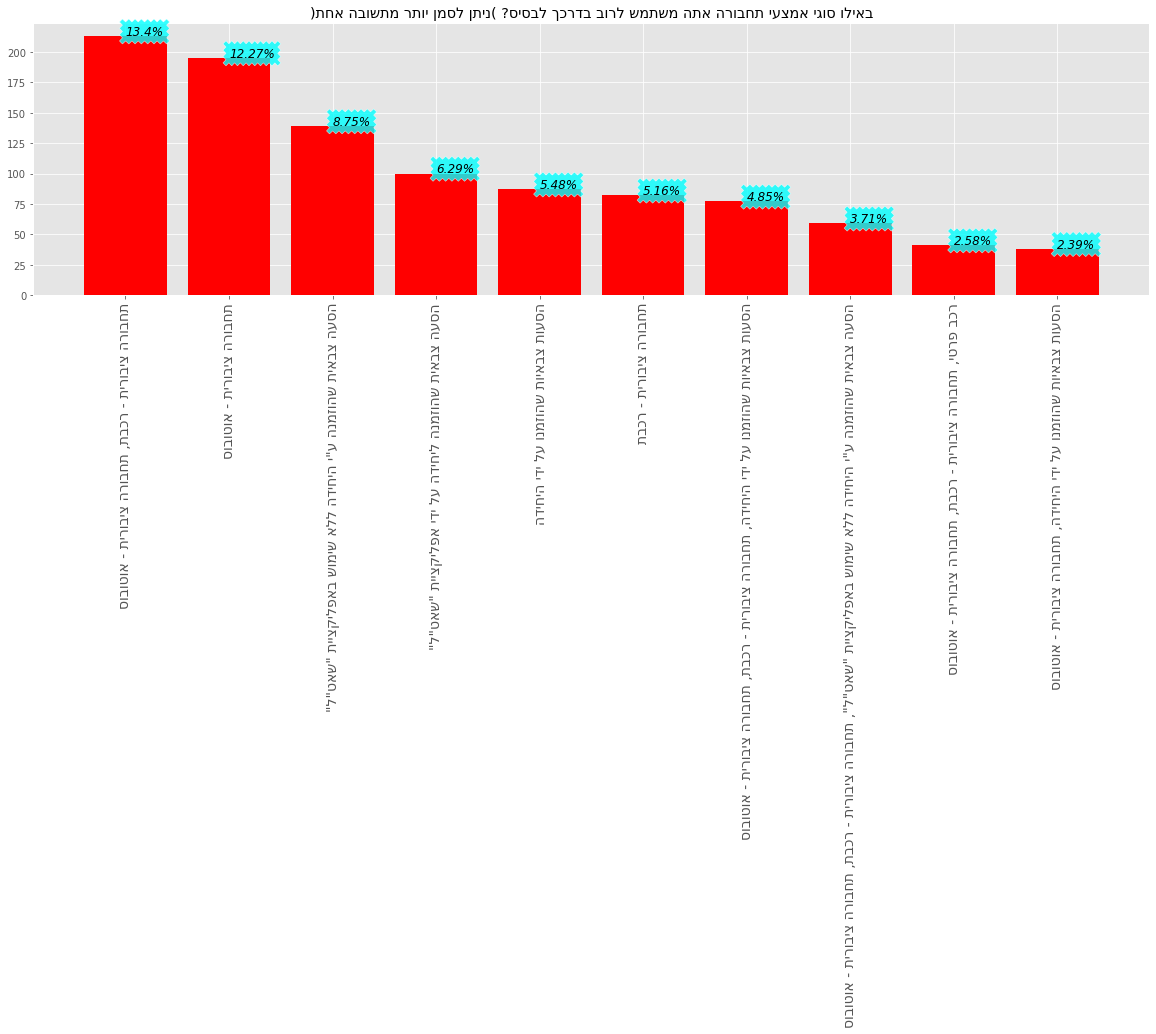

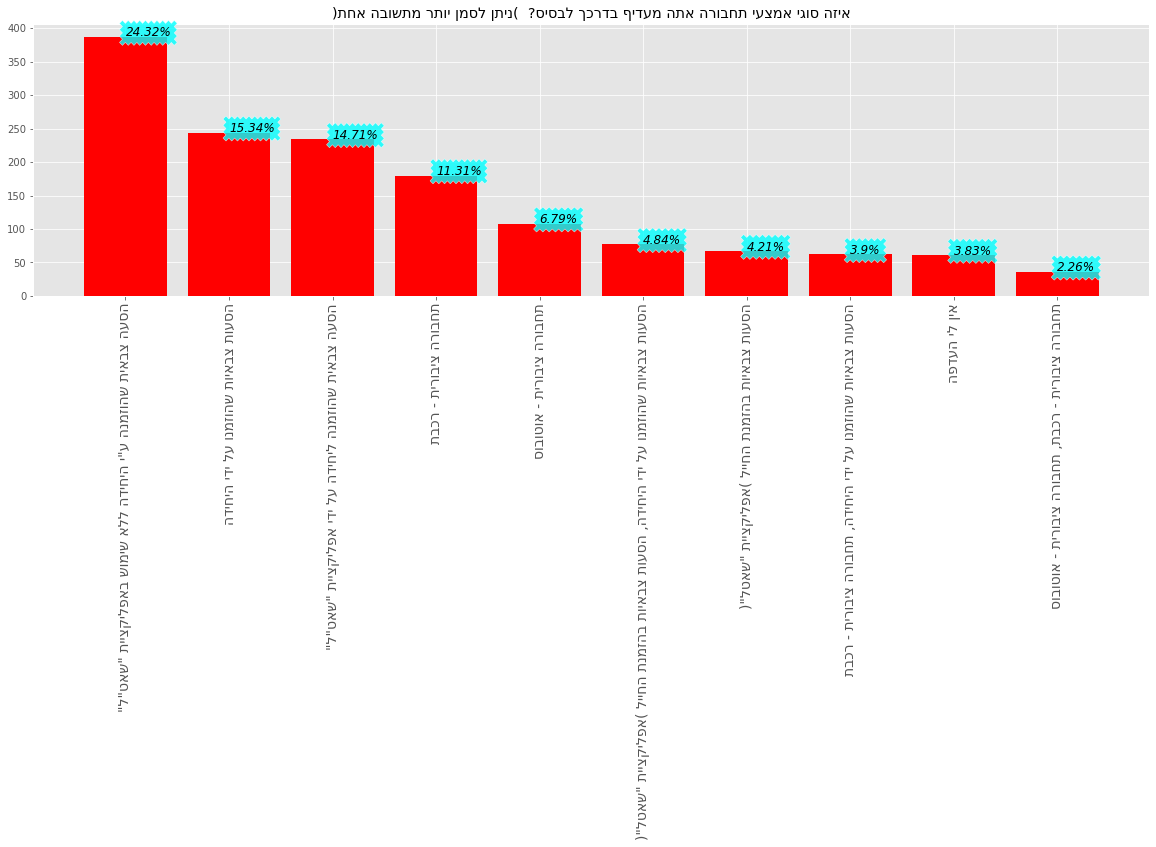

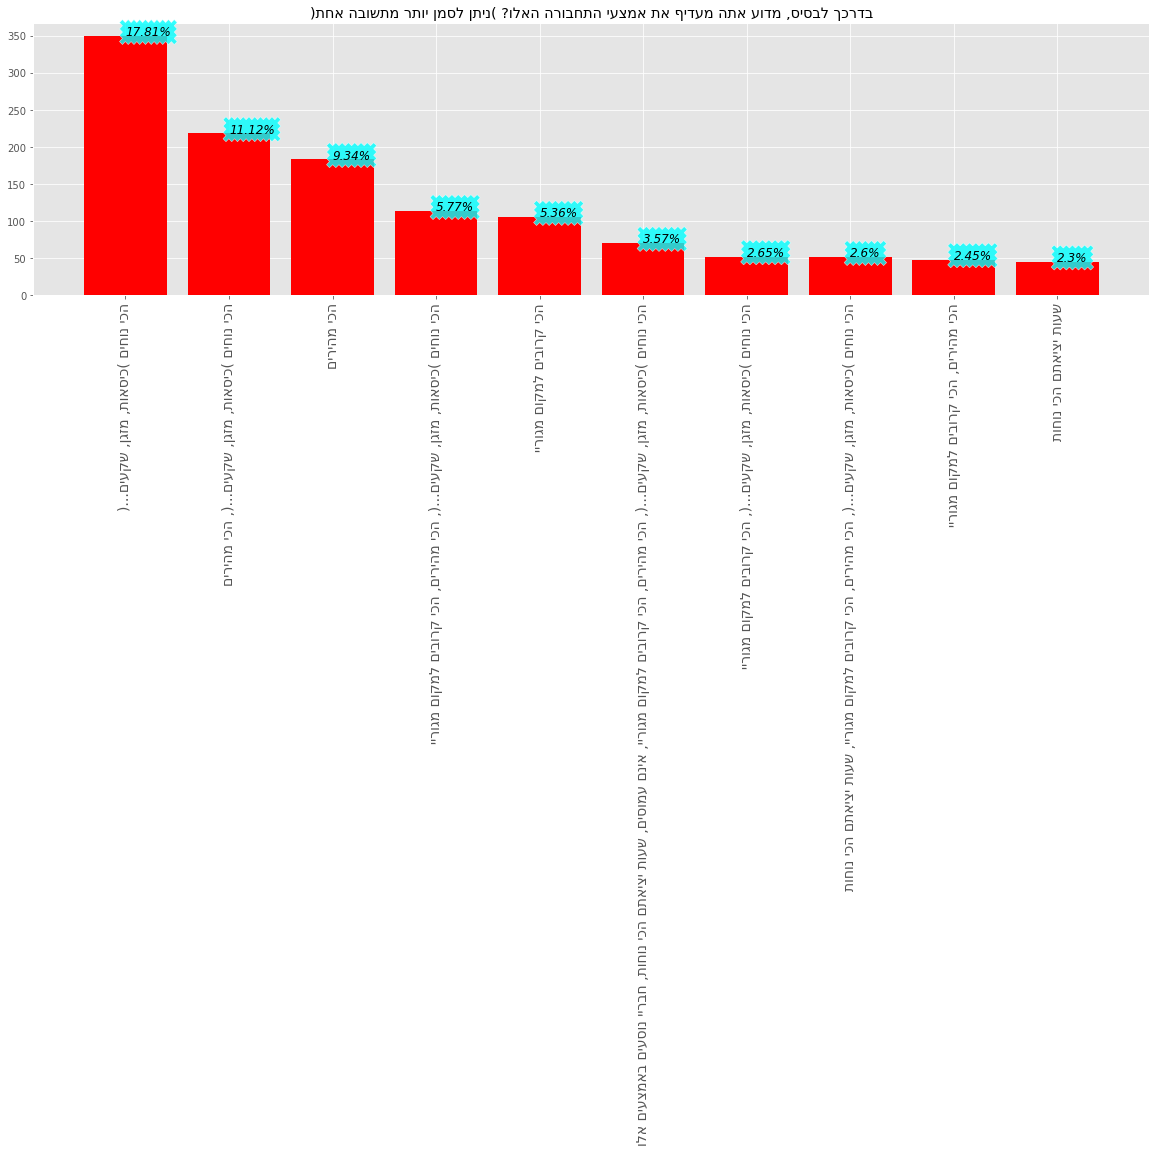

In [72]:
for i in range(15,18):
    all_plot_nominal3(i,10,'red','cyan')

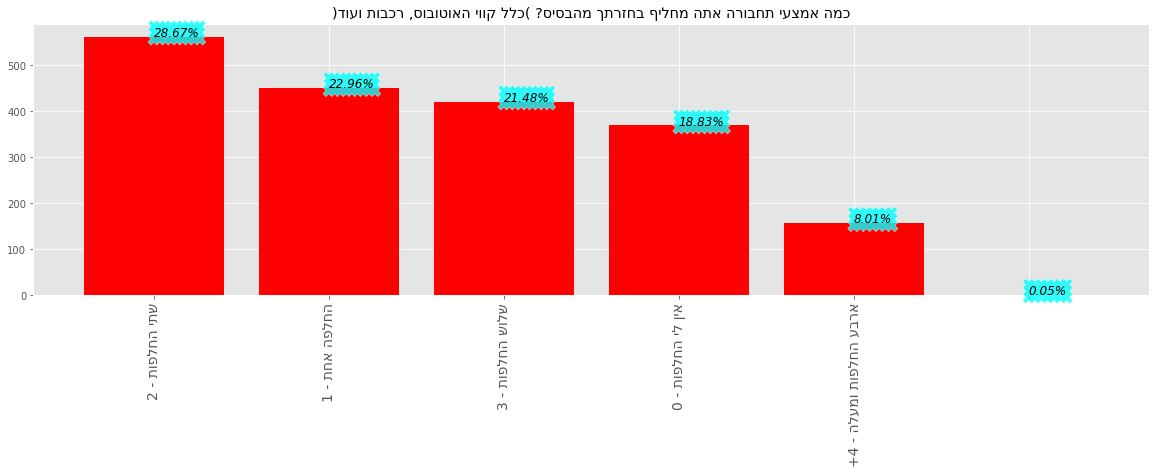

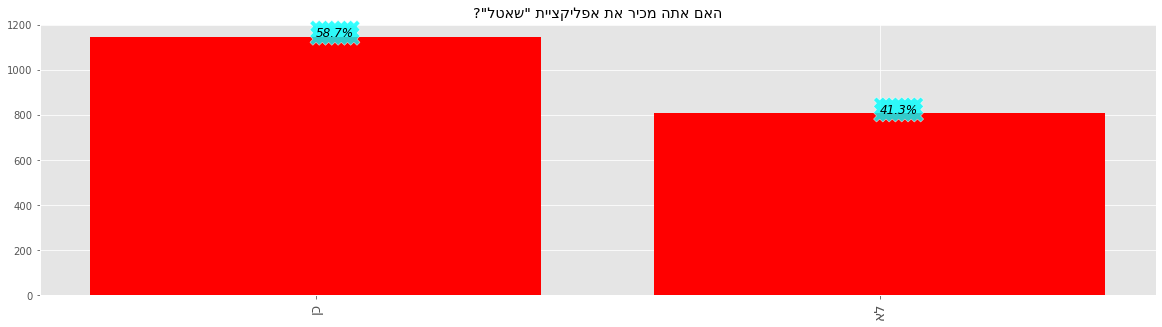

In [73]:
for i in range(22,24):
    all_plot_nominal3(i,10,'red','cyan')

# הצלבה חניון אזור

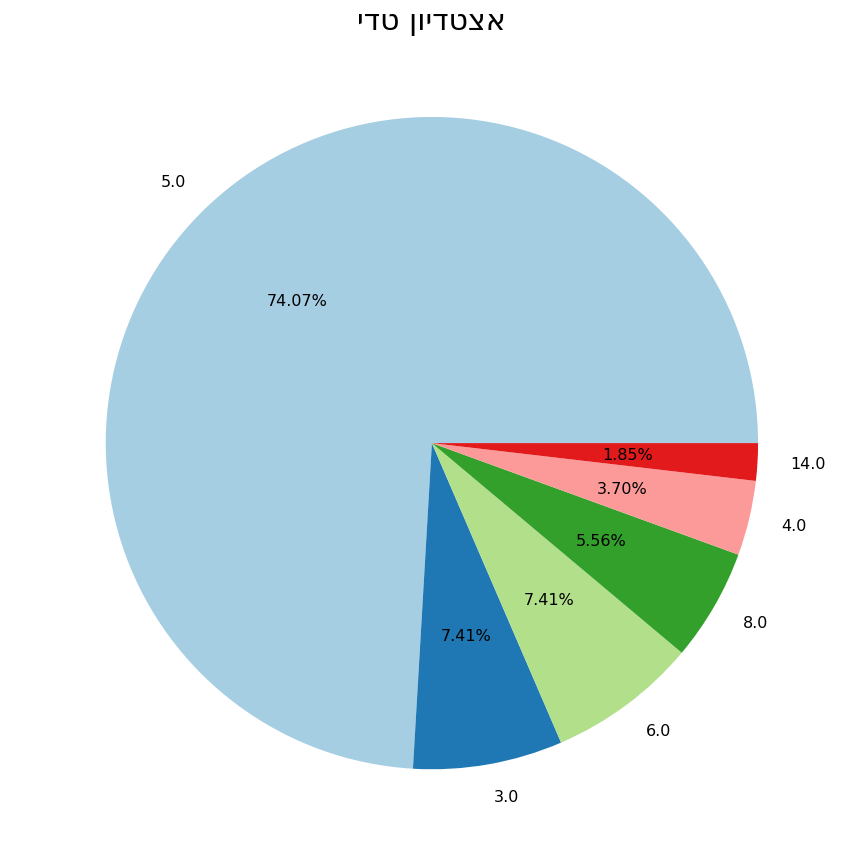

In [84]:
import seaborn as sns
r = "אצטדיון טדי"
henion_megurim = pd.crosstab(all_data[all_data.columns[5]],all_data[all_data.columns[48]])
#henion_megurim.columns = [i[::-1] for i in henion_megurim.columns]
tedi = henion_megurim.loc[r][henion_megurim.loc[r]>0].sort_values(ascending = False)
#tedi.index = [i[::-1] for i in tedi.index]
#define Seaborn color palette to use
colors = sns.color_palette('Paired')
tedi.plot(kind = "pie",colors = colors, figsize = (15,15), autopct='%0.2f%%',textprops={'fontsize': 16})
plt.title(r[::-1],size = 30)
plt.ylabel(" ")
plt.show()

In [88]:
henionim = ['חניון חוף זמיר חיפה''לב המפרץ חיפה',
       'אצטדיון רמת גן', 'תחנה מרכזית ירושלים', 'תחנת רכבת בנימינה ',
       'קרית גת', 'תחנה מרכזית אשקלון', 'חניון ארלוזורוב תל אביב',
       'תחנה מרכזית תל אביב', 'יס פלנט באר שבע', 'אצטדיון טדי',
       'תחנה מרכזית באר שבע', 'מודיעין מרכזית',
       'איצטדיון הדר יוסף תל אביב', 'תחנת רכבת נתניה', 'הדר יוסף תל אביב',
       'סמי עופר חיפה', 'חדרה', 'חניון טרנר באר שבע',
       'רכבת תל אביב סבידור', 'מחנה נתן', 'אוניברסיטת תל אביב',
       'מחלף אולגה', 'עפולה פארק העמק', 'אצטדיון המושבה ',
       'לב המפרץ חיפה', 'חצור הגלילית', 'חצור', 'אשדוד עד הלום',
       'מחלף נתניה', 'משתנה', 'צומת פרדיס', 'תחנה מרכזית המפרץ',
       'ראשונים', 'חיפה', 'רכבת בנימינה', 'טדי ירושלים', 'רידינג תל אביב',
       'הר הרצל ירושלים', 'קניון חולון', 'מסוף רעננה', 'קריה תל אביב',
       'ראש העין', 'הקריה']


henionim = ['חניון חוף זמיר חיפה','לב המפרץ חיפה','יס פלנט באר שבע','תחנה מרכזית באר שבע','טדי ירושלים','תחנה מרכזית ירושלים','בית דני','אצטדיון רמת גן']

array(['חניון חוף זמיר חיפה', 'חוף הכרמל חיפה', 'בית דני', 'מרכזית המפרץ',
       'אצטדיון רמת גן', 'תחנה מרכזית ירושלים', 'תחנת רכבת בנימינה ',
       'קרית גת', 'תחנה מרכזית אשקלון', 'חניון ארלוזורוב תל אביב',
       'תחנה מרכזית תל אביב', 'יס פלנט באר שבע', 'אצטדיון טדי',
       'תחנה מרכזית באר שבע', 'מודיעין מרכזית',
       'איצטדיון הדר יוסף תל אביב', 'תחנת רכבת נתניה', 'הדר יוסף תל אביב',
       'סמי עופר חיפה', 'חדרה', 'חניון טרנר באר שבע',
       'רכבת תל אביב סבידור', 'מחנה נתן', 'אוניברסיטת תל אביב',
       'מחלף אולגה', 'עפולה פארק העמק', 'אצטדיון המושבה ',
       'לב המפרץ חיפה', 'חצור הגלילית', 'חצור', 'אשדוד עד הלום',
       'מחלף נתניה', 'משתנה', 'צומת פרדיס', 'תחנה מרכזית המפרץ',
       'ראשונים', 'חיפה', 'רכבת בנימינה', 'טדי ירושלים', 'רידינג תל אביב',
       'הר הרצל ירושלים', 'קניון חולון', 'מסוף רעננה', 'קריה תל אביב',
       'ראש העין', 'הקריה'], dtype=object)

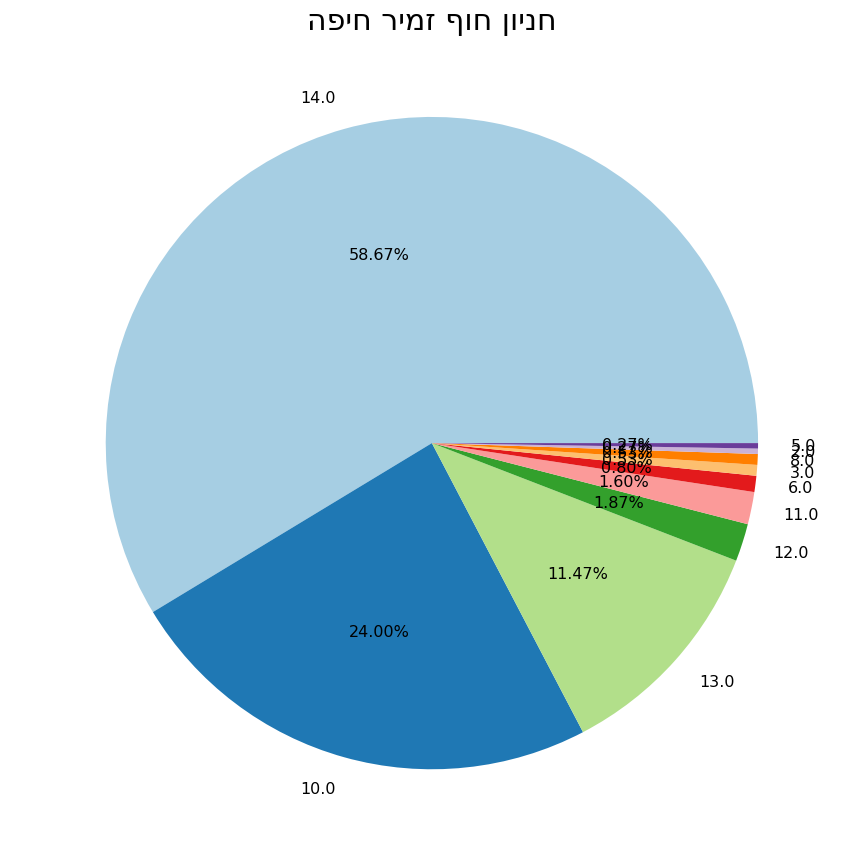

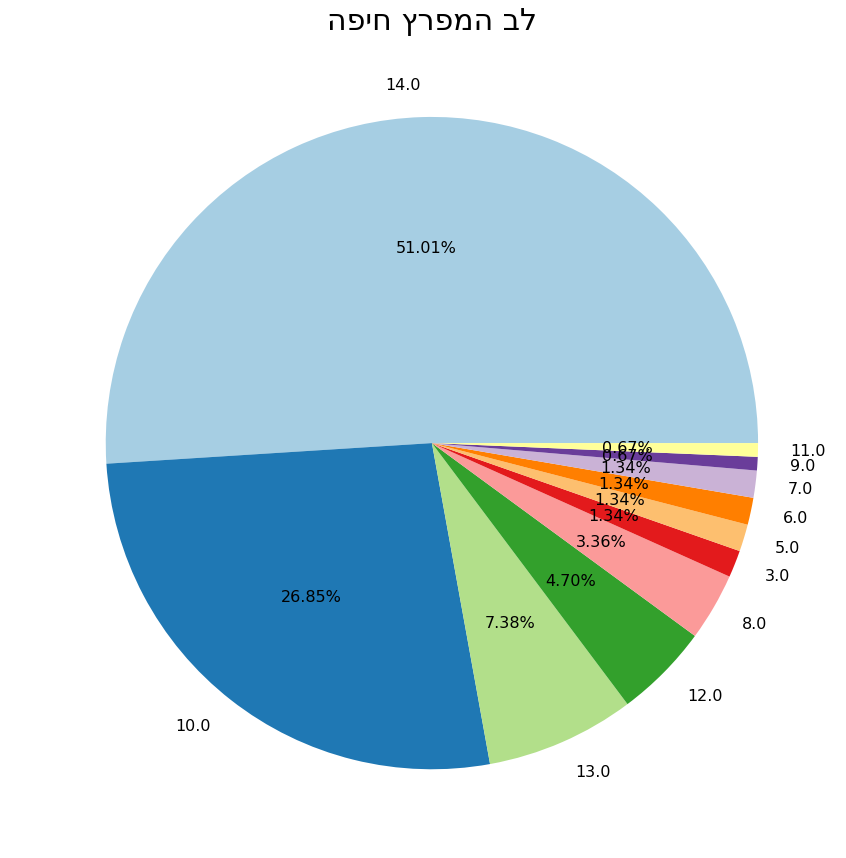

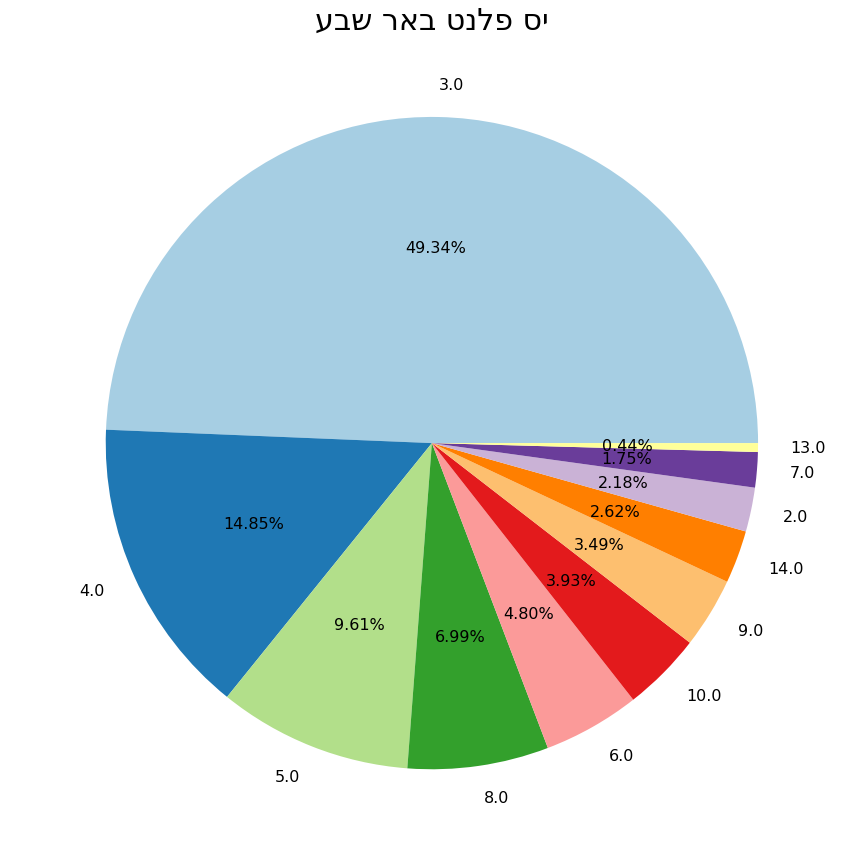

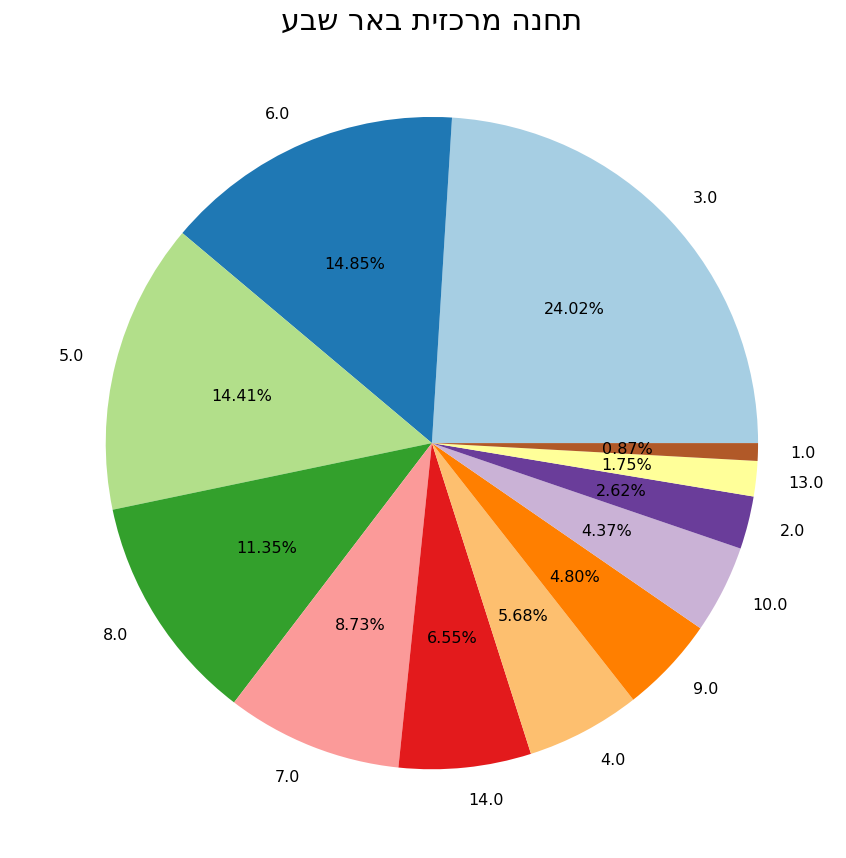

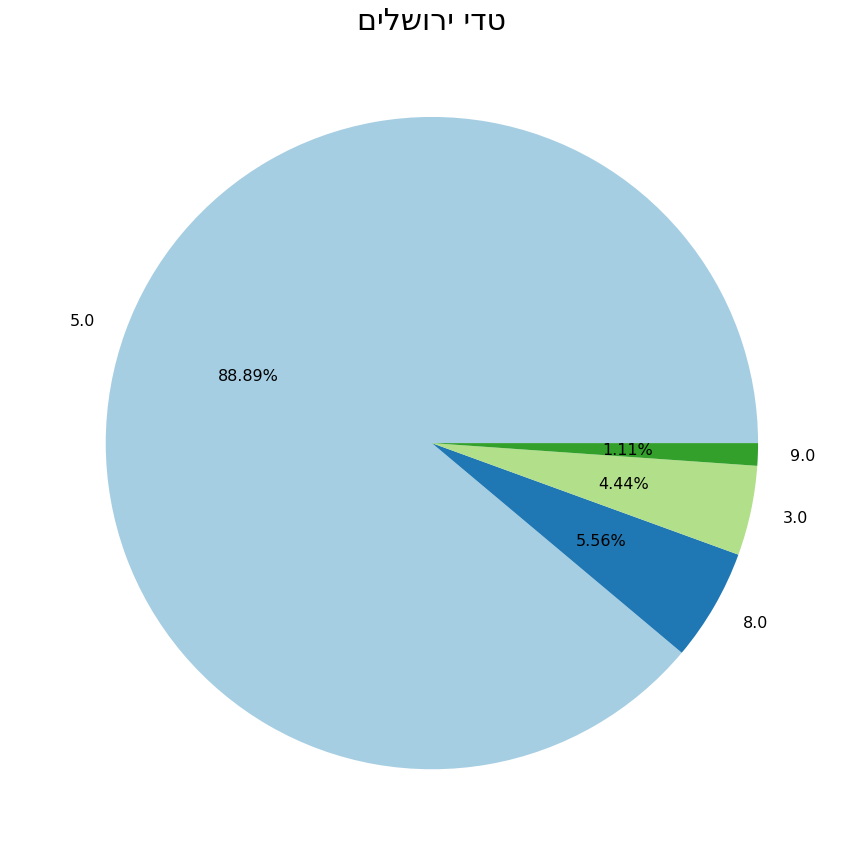

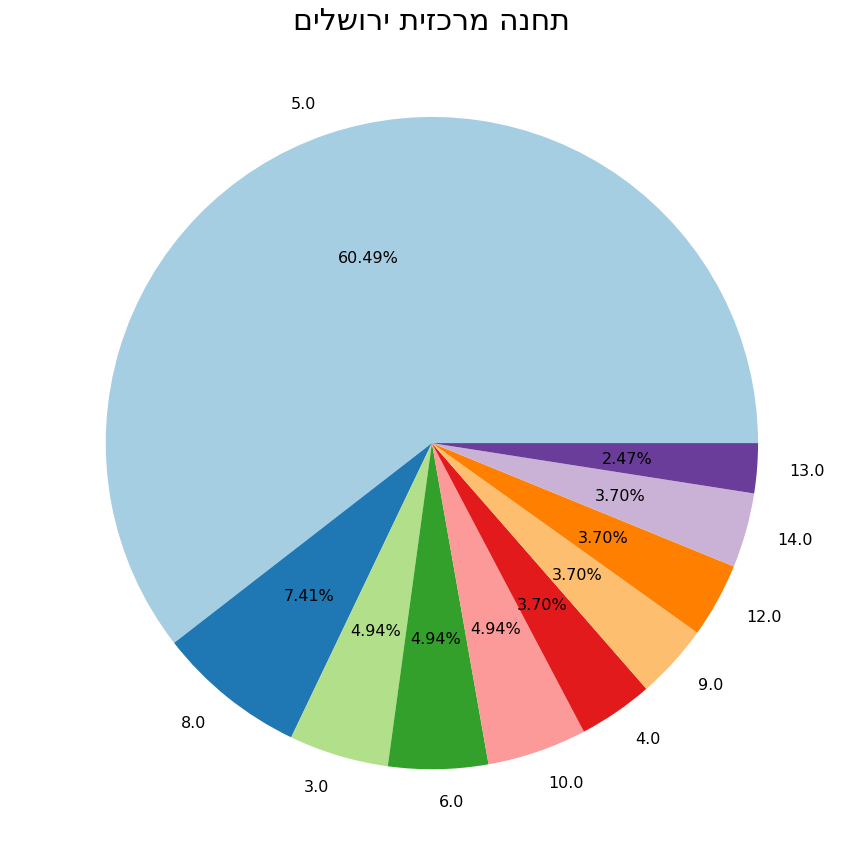

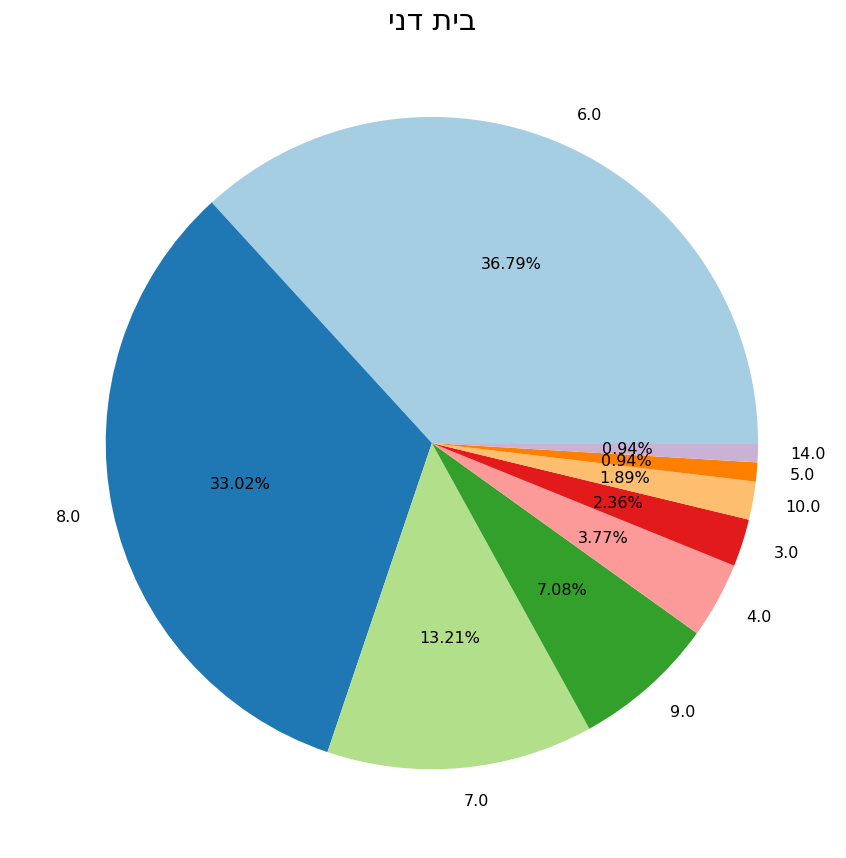

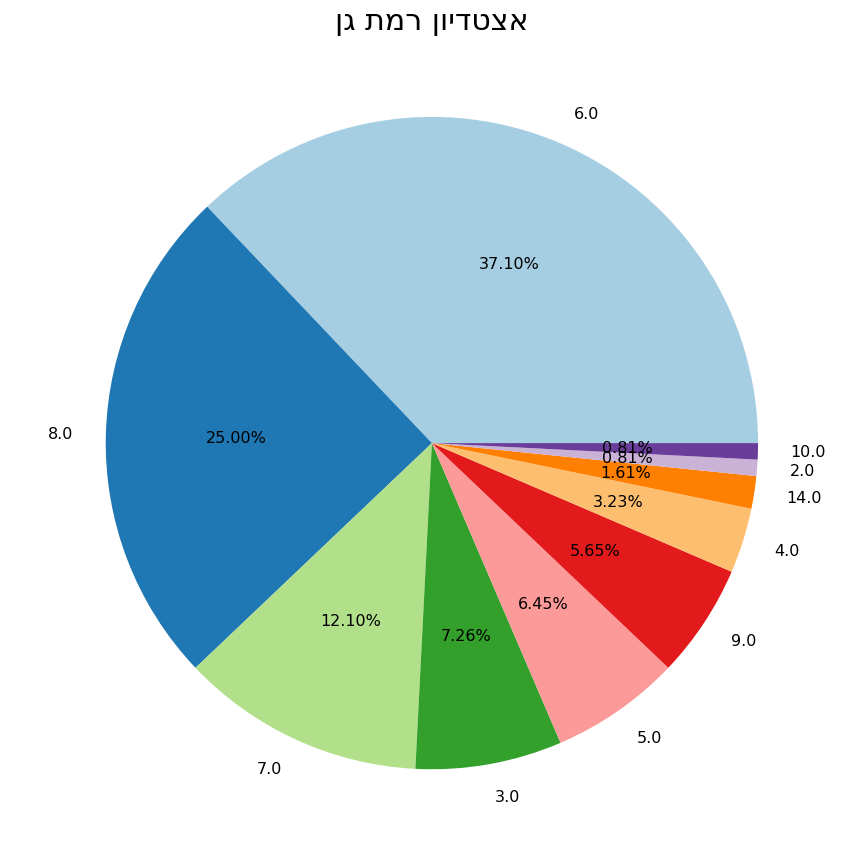

In [90]:

henionim = ['חניון חוף זמיר חיפה','לב המפרץ חיפה','יס פלנט באר שבע','תחנה מרכזית באר שבע','טדי ירושלים','תחנה מרכזית ירושלים','בית דני','אצטדיון רמת גן']

for r in henionim:
    henion_megurim = pd.crosstab(all_data[all_data.columns[5]],all_data[all_data.columns[48]])
    #henion_megurim.columns = [i[::-1] for i in henion_megurim.columns]
    tedi = henion_megurim.loc[r][henion_megurim.loc[r]>0].sort_values(ascending = False)
    #tedi.index = [i[::-1] for i in tedi.index]
    #define Seaborn color palette to use
    colors = sns.color_palette('Paired')
    tedi.plot(kind = "pie",colors = colors, figsize = (15,15), autopct='%0.2f%%',textprops={'fontsize': 16})
    plt.title(r[::-1],size = 30)
    plt.ylabel(" ")
    plt.show()

# פילוח אזורים יום א בלבד

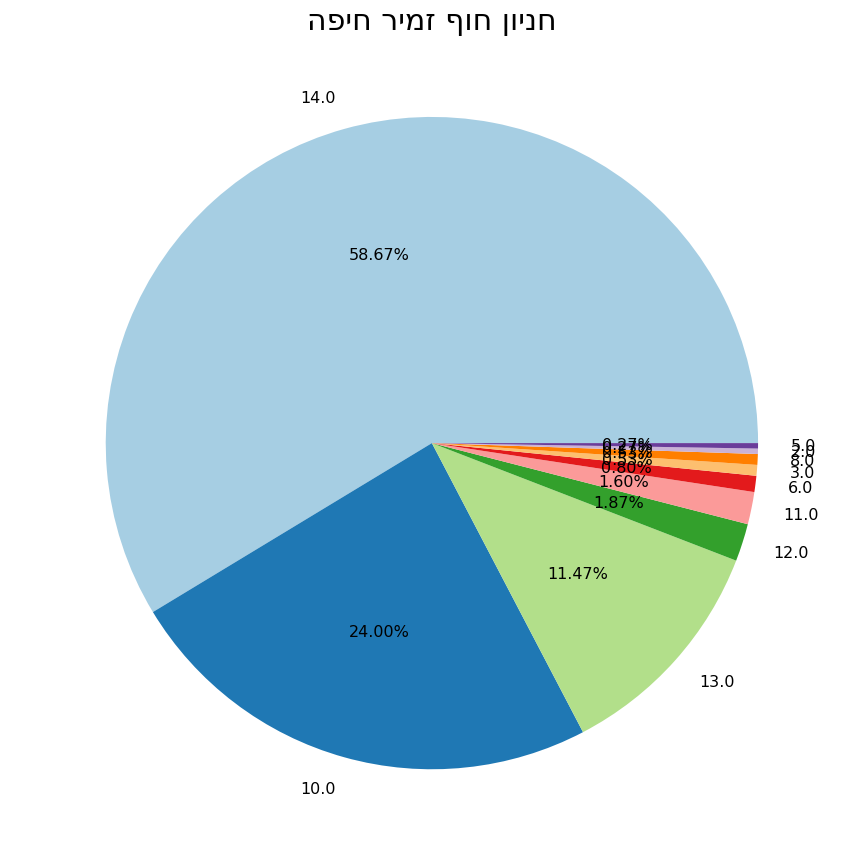

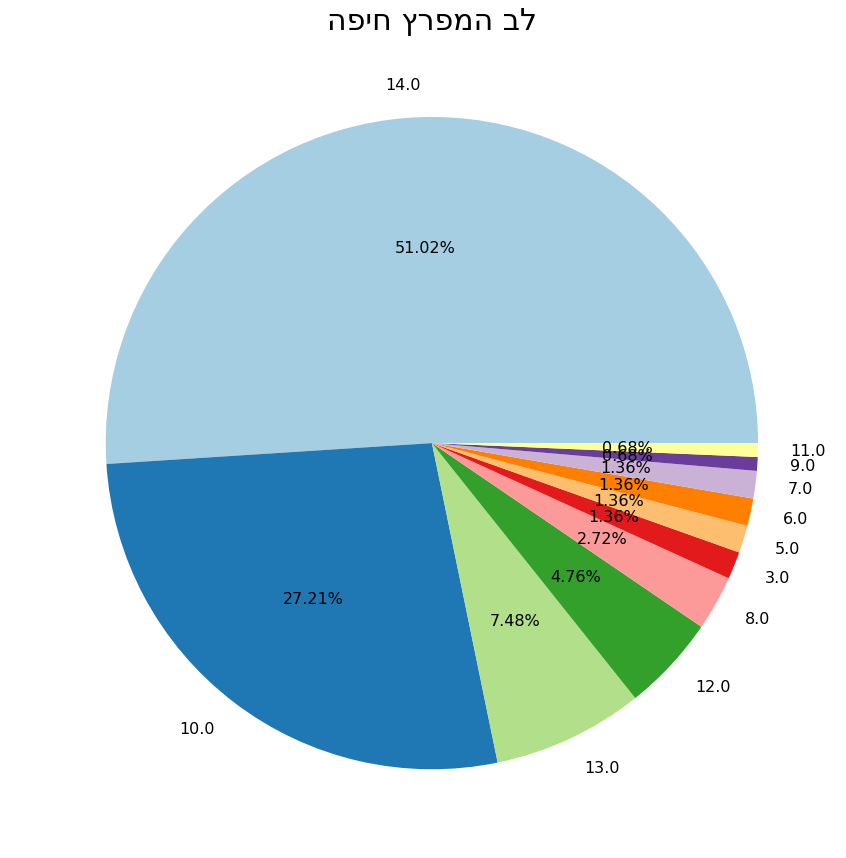

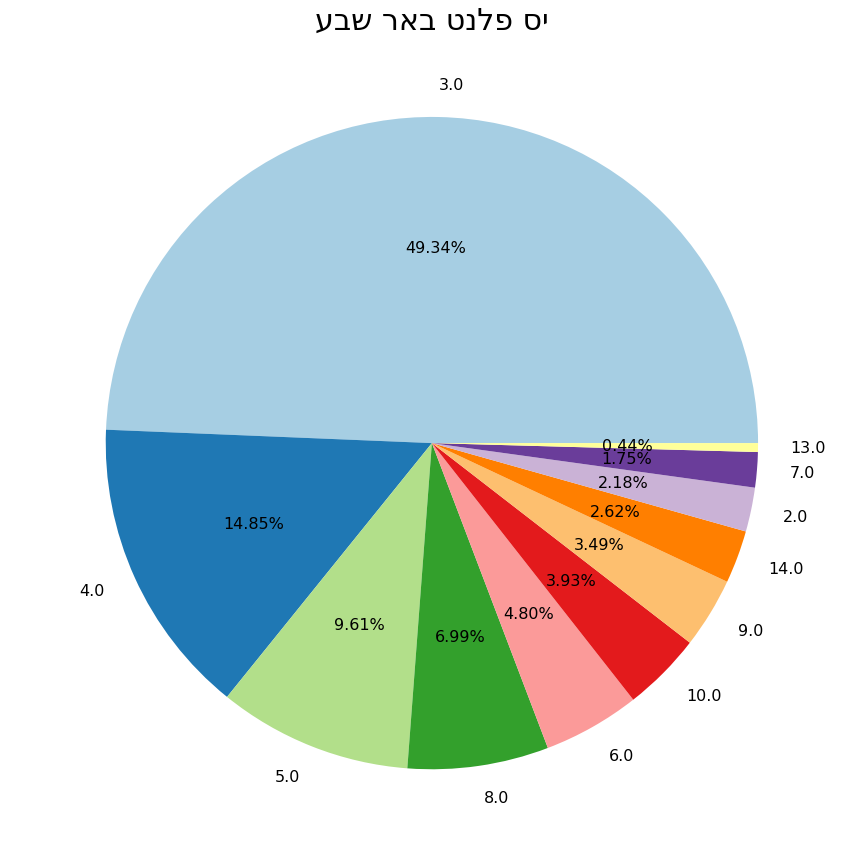

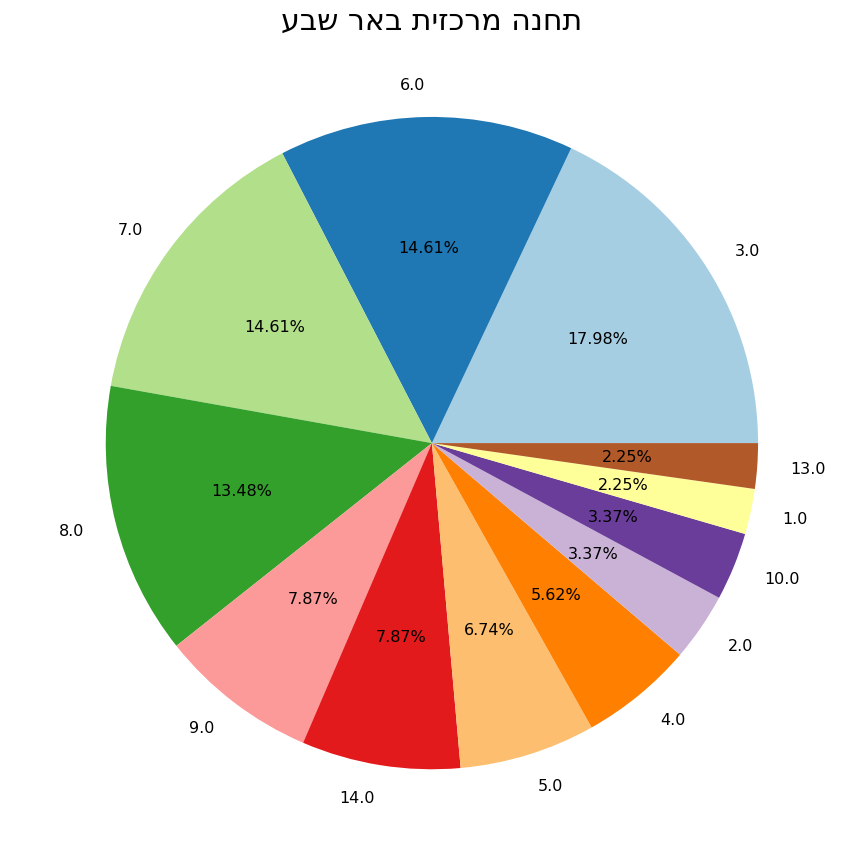

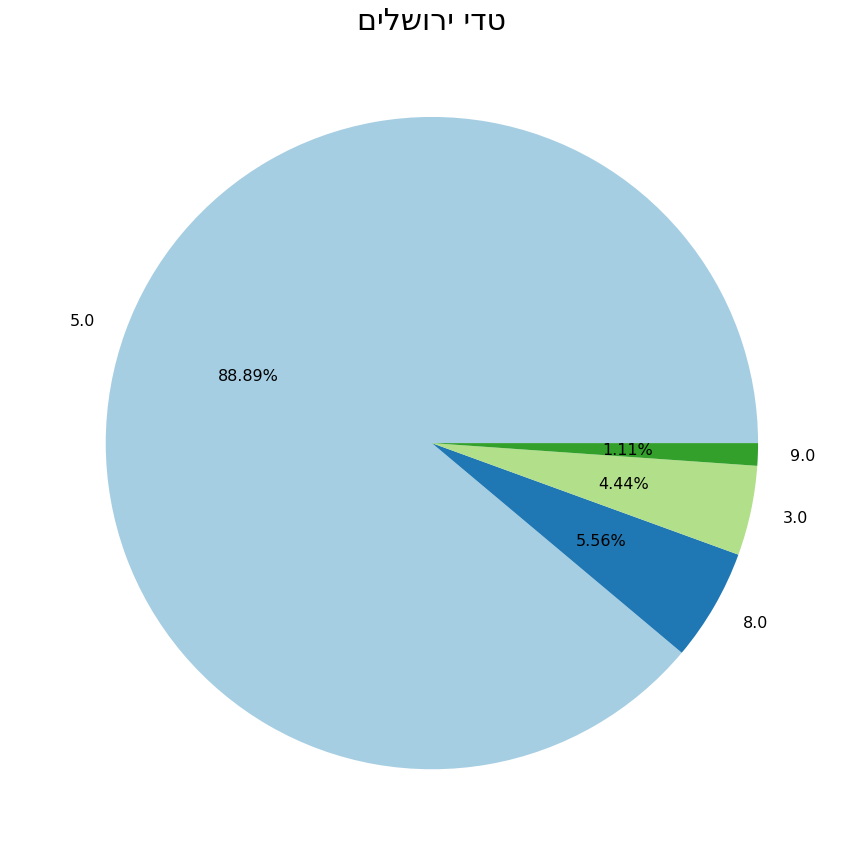

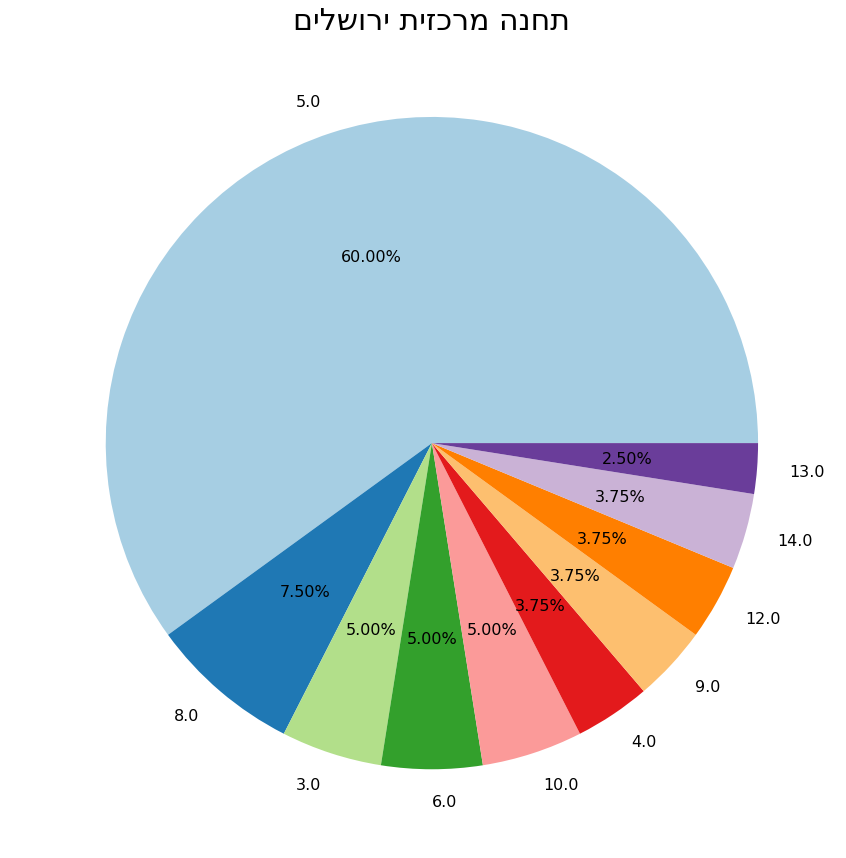

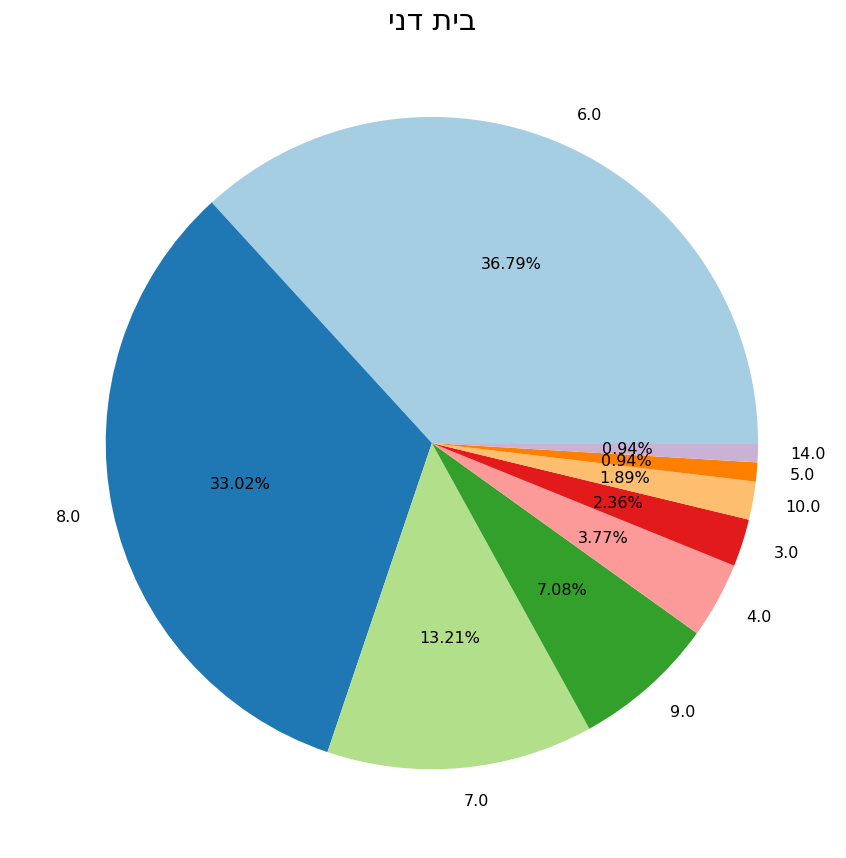

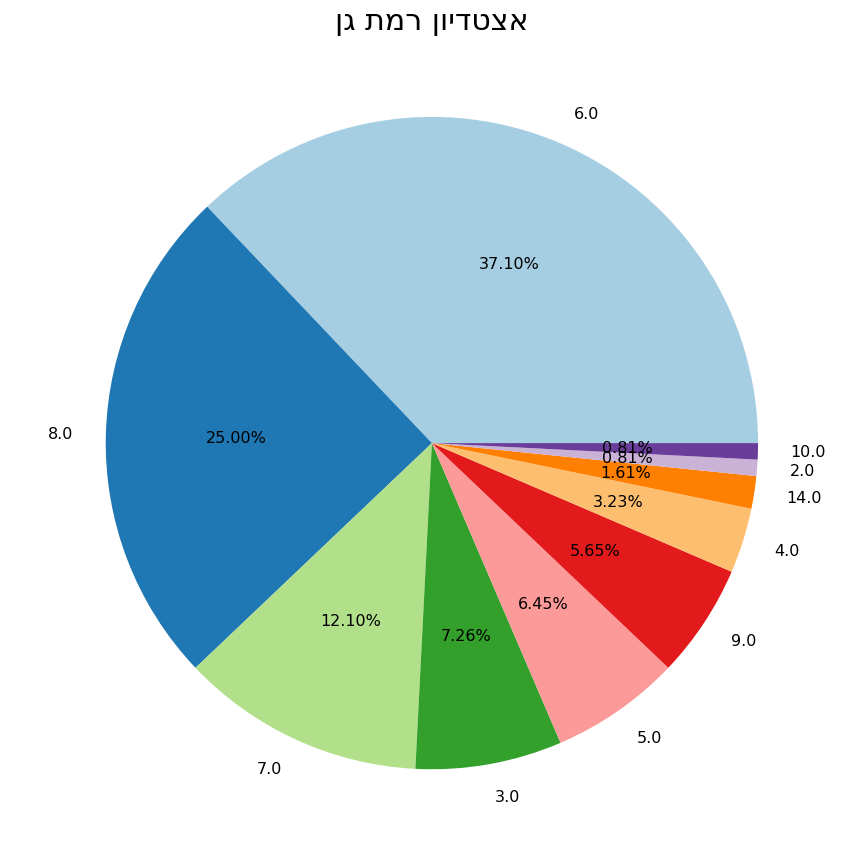

In [93]:
df = all_data[all_data[all_data.columns[36]]=="ראשון"]
for r in henionim:
    henion_megurim = pd.crosstab(df[df.columns[5]],df[df.columns[48]])
    #henion_megurim.columns = [i[::-1] for i in henion_megurim.columns]
    tedi = henion_megurim.loc[r][henion_megurim.loc[r]>0].sort_values(ascending = False)
    #tedi.index = [i[::-1] for i in tedi.index]
    #define Seaborn color palette to use
    colors = sns.color_palette('Paired')
    tedi.plot(kind = "pie",colors = colors, figsize = (15,15), autopct='%0.2f%%',textprops={'fontsize': 16})
    plt.title(r[::-1],size = 30)
    plt.ylabel(" ")
    plt.show()

In [95]:
df.iloc[:,5].value_counts()

חניון חוף זמיר חיפה          377
יס פלנט באר שבע              230
בית דני                      213
לב המפרץ חיפה                148
אצטדיון רמת גן               124
רידינג תל אביב               106
טדי ירושלים                   93
תחנה מרכזית באר שבע           90
תחנה מרכזית אשקלון            84
תחנה מרכזית ירושלים           82
הדר יוסף תל אביב              65
אצטדיון טדי                   54
חוף הכרמל חיפה                53
תחנה מרכזית תל אביב           42
חניון ארלוזורוב תל אביב       10
מודיעין מרכזית                 4
חצור הגלילית                   3
רכבת תל אביב סבידור            3
חצור                           2
מחנה נתן                       2
סמי עופר חיפה                  2
איצטדיון הדר יוסף תל אביב      2
מרכזית המפרץ                   2
חניון טרנר באר שבע             1
צומת פרדיס                     1
ראש העין                       1
קריה תל אביב                   1
מסוף רעננה                     1
קניון חולון                    1
הר הרצל ירושלים                1
תחנת רכבת 